# Evaluación y Comparativa de Modelos de Lenguaje a Gran Escala (LLM) en Local para Arquitecturas RAG: Efectividad, Privacidad y Autonomía

Este notebook constituye el espacio de trabajo donde se han desarrollado y ejecutado los experimentos presentados en este estudio. Aquí se integra todo el marco experimental, desde la configuración inicial del entorno hasta la ejecución y análisis de los flujos RAG, utilizando las interfaces diseñadas específicamente para este propósito. 

En cada sección se abordan las distintas etapas del experimento, incluyendo la carga de datos, la construcción de pipelines RAG y la evaluación mediante las métricas definidas en el marco RAGAs. Este notebook no solo documenta los resultados obtenidos, sino que también sirve como referencia técnica para replicar y ajustar los experimentos en futuros estudios.

## Configuración del Entorno

Antes de ejecutar este notebook, asegúrate de que tu entorno está correctamente configurado para evitar problemas de compatibilidad o interferencias con otros proyectos. A continuación, te indicamos los pasos necesarios para el set up:

1. **Instalación de Python 3.12**:  
   Este notebook requiere Python 3.12. Descárgalo e instálalo desde [python.org](https://www.python.org/).

2. **Crear un entorno virtual (recomendado)**:
    Para evitar conflictos con otras configuraciones de Python, se recomienda crear un entorno virtual. Puedes hacerlo con los siguientes comandos:

    ```
    py -3.12 -m venv venv
    source venv/bin/activate  # En Linux/Mac
    venv\Scripts\activate     # En Windows 
    ```

3. **Instalación de iKernel**:  
   Para utilizar Python 3.12 como motor del notebook, necesitas instalar el módulo `ipykernel`. Esto puede hacerse directamente desde el entorno virtual mediante el siguiente comando:  

   ```
   pip install ipykernel
   ```

   Asegúrate de añadir este kernel al notebook una vez instalado.

4. **Instalación de dependencias**:
    Las dependencias necesarias para este notebook se encuentran en la celda de configuración. Estas se instalarán directamente desde el notebook mediante `%pip install...` Si las instalas por primera vez, es posible que necesites reiniciar el kernel para que surtan efecto.

**Nota importante:** Durante la instalación de las librerías necesarias en este entorno virtual, es posible que aparezcan mensajes relacionados con incompatibilidades entre algunas dependencias. Por ejemplo, conflictos menores entre las versiones de `tenacity`, `grpcio`, `protobuf` y `deepeval`. Estas incompatibilidades son inherentes a las dependencias actuales de las librerías utilizadas en este notebook, pero hemos verificado que no afectan su ejecución ni los resultados esperados.

In [ ]:
## ----------------------------------------------------------------------------
## CONFIGURACIÓN DEL ENTORNO: 
# Instalación de paquetes y librerías necesarias
## ----------------------------------------------------------------------------

# Update pip
%pip install -qU pip

# Langchain Installation
%pip install -qU langchain langchain_community

# PDF Loaders Libraries
%pip install -qU pymupdf 
%pip install -qU langchain-unstructured "langchain-unstructured[local]" unstructured-client unstructured "unstructured[pdf]" 
%pip install -qU azure-ai-documentintelligence azure-core
%pip install -qU langchain-text-splitters

# Embeddings Models Libraries
%pip install -qU langchain_ollama
%pip install -qU langchain-openai
%pip install -qU langchain_voyageai
%pip install -qU langchain_mistralai

# Vector Store Libraries
%pip install -qU langchain_chroma
%pip install -qU langchain-mongodb pymongo

# Large Language Models Libraries
%pip install -qU langchain-ollama
%pip install -qU langchain-openai
%pip install -qU langchain_anthropic
%pip install -qU langchain-google-genai
%pip install -qU langchain_mistralai

# Evaluation Libraries
%pip install -qU deepeval
%pip install -qU instructor

# Other Libraries
%pip install -qU python-dotenv
%pip install -qU ipywidgets
%pip install -qU tqdm
%pip install -qU transformers
%pip install -qU seaborn
%pip install -qU plotly
%pip install -qU notebook

## Configuración de las Variables de Entorno

Este notebook requiere varias claves de API y configuraciones específicas. Por favor, copia el archivo `.env_sample`, renómbralo a `.env` y edítalo con tus claves y configuraciones.

In [ ]:
## ----------------------------------------------------------------------------
## CONFIGURACIÓN DE LAS VARIABLES DE ENTORNO: 
# Carga de variables de entorno desde el archivo .env
## ----------------------------------------------------------------------------

# Load environment variables from .env file
from dotenv import load_dotenv
load_dotenv(dotenv_path="../.env", verbose=True)

## Interfaz para los Módulos de Vectorización

En este apartado, construiremos nuestra interfaz de embeddings personalizada en base a los conectores de embeddings proporcionados por LangChain. Gracias a que LangChain actúa como capa de abstracción, todos los conectores funcionan de manera homogénea, lo que nos permite intercambiarlos sin complicaciones. De esta forma, podremos cargar dinámicamente distintos módulos de embeddings según lo definan nuestras variables, facilitando la integración y flexibilidad en nuestros experimentos.

In [2]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de Vectorización
# Nomic Embeddings: nomic-embed-text - LOCAL [768]
## ----------------------------------------------------------------------------

'''
1. Download Ollama from https://ollama.com
2. Download the model nomic-embed-text from https://ollama.com/library/nomic-embed-text:latest
3. Start the Ollama server
'''

from langchain_ollama import OllamaEmbeddings

def myNomicEmbedder():
    embedder = OllamaEmbeddings(model="nomic-embed-text")
    return embedder

## # Test Embedder
## input_text = "The meaning of life is 42"
## embedder = myNomicEmbedder()
## vector = embedder.embed_query(input_text)
## print(vector[:3])

In [3]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de Vectorización
# Snowflake Embeddings: snowflake-arctic-embed:335m - LOCAL [1024]
## ----------------------------------------------------------------------------

'''
1. Download Ollama from https://ollama.com
2. Download the model snowflake-arctic-embed from https://ollama.com/library/snowflake-arctic-embed
3. Start the Ollama server
'''

from langchain_ollama import OllamaEmbeddings

def mySnowflakeArcticEmbedder():
    embedder = OllamaEmbeddings(model="snowflake-arctic-embed:335m")
    return embedder

## # Test Embedder
## input_text = "The meaning of life is 42"
## embedder = mySnowflakeArcticEmbedder()
## vector = embedder.embed_query(input_text)
## print(vector[:3])

In [4]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de Vectorización
# OpenAI Embeddings: text-embedding-3-large - CLOUD [3072]
## ----------------------------------------------------------------------------

'''
1. Create an account in OpenAI API Platform: https://platform.openai.com/
2. Create an API Key
3. Set up the API Key in the .env file
'''

from langchain_openai import OpenAIEmbeddings

def myOpenAiEmbedder():
    embedder = OpenAIEmbeddings(model="text-embedding-3-large")
    return embedder

## # Test Embedder
## input_text = "The meaning of life is 42"
## embedder = myOpenAiEmbedder()
## vector = embedder.embed_query(input_text)
## print(vector[:3])

In [5]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de Vectorización
# Voyage AI Embeddings: voyage-3 - CLOUD [1024]
## ----------------------------------------------------------------------------

'''
1. Create an account in Voyage AI Platform: https://www.voyageai.com
2. Create an API Key
3. Set up the API Key in the .env file
'''

import warnings
from tqdm import TqdmWarning
warnings.filterwarnings("ignore", category=TqdmWarning)

import os
from langchain_voyageai import VoyageAIEmbeddings

def myVoyageAiEmbedder():
    embedder = VoyageAIEmbeddings(voyage_api_key=os.getenv("VOYAGEAI_API_KEY"), model="voyage-3")
    return embedder

## # Test Embedder
## input_text = "The meaning of life is 42"
## embedder = myVoyageAiEmbedder()
## vector = embedder.embed_query(input_text)
## print(vector[:3])

In [6]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de Vectorización
# Mistral AI Embeddings: mistral-embed - CLOUD [1024]
## ----------------------------------------------------------------------------

'''
1. Create an account in Mistral AI Platform: https://console.mistral.ai
2. Create an API Key
3. Set up the API Key in the .env file
4. You might need as well a Hugging Face Token. Set it up in the .env file
'''

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="langchain_mistralai.embeddings")

from langchain_mistralai import MistralAIEmbeddings

def myMistralAiEmbedder():
    embedder = MistralAIEmbeddings(model="mistral-embed")
    return embedder

## # Test Embedder
## input_text = "The meaning of life is 42"
## embedder = myMistralAiEmbedder()
## vector = embedder.embed_query(input_text)
## print(vector[:3])

In [7]:
## ----------------------------------------------------------------------------
## INTERFAZ PARA LOS MÓDULOS DE VECTORIZACIÓN:
# Interfaz personalizada para definir de manera dinámica el modulo de 
# vectorización.

# Modelos Disponibles:
# - nomic-embed-text
# - snowflake-arctic-embed-335m
# - text-embedding-3-large
# - voyage-3
# - mistral-embed
## ----------------------------------------------------------------------------

class MyEmbedder:

    def __init__(self, model: str):
        self.model = model
        self.dimension = {
            "nomic-embed-text": 768,
            "snowflake-arctic-embed-335m": 1024,
            "text-embedding-3-large": 3072,
            "voyage-3": 1024,
            "mistral-embed": 1024
        }.get(model, None)
        
    def get_embedder(self):
        if self.model == "nomic-embed-text":
            return myNomicEmbedder()
        elif self.model == "snowflake-arctic-embed-335m":
            return mySnowflakeArcticEmbedder()
        elif self.model == "text-embedding-3-large":
            return myOpenAiEmbedder()
        elif self.model == "voyage-3":
            return myVoyageAiEmbedder()
        elif self.model == "mistral-embed":
            return myMistralAiEmbedder()
        else:
            raise ValueError(f"Model {self.model} not supported")

In [ ]:
## ----------------------------------------------------------------------------
## INTERFAZ PARA LOS MÓDULOS DE VECTORIZACIÓN:
# Prueba de la interfaz personalizada para los módulos de vectorización.
## ----------------------------------------------------------------------------

# Define the embedding model to use
# Options: 'nomic-embed-text', 'snowflake-arctic-embed-335m', 'text-embedding-3-large', 'voyage-3', 'mistral-embed'
embedding_model = 'text-embedding-3-large'
embedder = MyEmbedder(model=embedding_model).get_embedder()

# Test the embedder
input_text = 'The meaning of life is 42'
embedding = embedder.embed_query(input_text)
print(f'Lenght of the vector: {len(embedding)}.\nFirst 3 elements: {embedding[:3]} ...')

## Interfaz para los Módulos de Bases de Datos de Vectores

En esta sección, definiremos nuestras bases de datos de vectores y los retrievers asociados utilizando los conectores disponibles en LangChain. Aunque todos los conectores de bases de datos de vectores comparten una interfaz común, presentan diferencias en cómo filtran o eliminan la información, lo que nos obliga a implementar algunas variaciones en estos procesos. A pesar de estas diferencias, LangChain sigue actuando como una capa de abstracción que facilita la integración y el intercambio de bases de datos de vectores, permitiéndonos cargarlas dinámicamente según lo definan nuestras variables y garantizando la flexibilidad en nuestros experimentos.

In [8]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de Bases de Datos de Vectores
# Chroma Vector Store - LOCAL
## ----------------------------------------------------------------------------

'''
1. The Chroma Vector Store is a local database for storing and querying vectors.
2. The objects are stored by default in the directory "../ChromaDb".
'''

from langchain_chroma import Chroma

def myChromaDbVectorStore(Embedder: MyEmbedder):
    vector_store = Chroma(
        collection_name=f'collection-{Embedder.model}',
        embedding_function=Embedder.get_embedder(),
        persist_directory="../ChromaDb",
        # Available functions: 'l2', 'cosine', and 'ip'
        collection_metadata={"hnsw:space": "cosine"} 
    )
    return vector_store

In [9]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de Bases de Datos de Vectores
# MongoDB Atlas Vector Store - CLOUD
## ----------------------------------------------------------------------------

'''
1. Create an account in MongoDB Atlas: https://www.mongodb.com/cloud/atlas
2. Create a Cluster
3. Update the .env file with the MongoDB User, Password, and Cluster URI
4. First time setting up a collection, set create_index=True
'''

import os
from pymongo import MongoClient
from langchain_mongodb import MongoDBAtlasVectorSearch

def myMongoDbAtlasVectorStore(Embedder: MyEmbedder, create_index: bool = False):
    client = MongoClient(os.getenv("MONGO_DB_CLUSTER_URI"))

    DB_NAME = "myMongoDbAtlasVectorStore"
    COLLECTION_NAME = f"collection-{Embedder.model}"
    ATLAS_VECTOR_SEARCH_INDEX_NAME = f"index-{Embedder.model}"

    MONGODB_COLLECTION = client[DB_NAME][COLLECTION_NAME]

    vector_store = MongoDBAtlasVectorSearch(
        collection=MONGODB_COLLECTION,
        embedding=Embedder.get_embedder(),
        index_name=ATLAS_VECTOR_SEARCH_INDEX_NAME,
        # Available functions: 'euclidean', 'cosine', and 'dotProduct'
        relevance_score_fn="cosine", 
    )

    # Create the vector search index - Needs to be done on the initial setup
    if create_index:
        vector_store.create_vector_search_index(dimensions=Embedder.dimension, filters=["source", "parser"])

    return vector_store

In [10]:
## ----------------------------------------------------------------------------
## INTERFAZ PARA LOS MÓDULOS DE BASES DE DATOS DE VECTORES:
# Interfaz personalizada para definir de manera dinámica el modulo de base 
# de datos de vectores.

# Proveedores Disponibles:
# - chromadb
# - mongodb
## ----------------------------------------------------------------------------

from uuid import uuid4

class MyVectorStore:

    def __init__(self, provider: str, Embedder: MyEmbedder):
        self.provider = provider
        self.Embedder = Embedder
    
    def get_vector_store(self):
        if self.provider == "chromadb":
            return myChromaDbVectorStore(Embedder=self.Embedder)
        elif self.provider == "mongodb":
            return myMongoDbAtlasVectorStore(Embedder=self.Embedder)
        else:
            raise ValueError(f"Provider {self.provider} not supported")

    def get_vector_store_documents(self, source: str, parser: str):
        vector_store = self.get_vector_store()

        if self.provider == "chromadb":
            old_docs = vector_store.get(where={"$and": [{"source": source}, {"parser": parser}]})
            return old_docs["ids"]
        
        elif self.provider == "mongodb":
            old_docs = list(vector_store._collection.find({"source": source, "parser": parser}, {"_id": 1}))
            return [doc["_id"] for doc in old_docs]

    def purge_vector_store_documents(self, source: str, parser: str):
        vector_store = self.get_vector_store()
        document_ids = self.get_vector_store_documents(source=source, parser=parser)
        if document_ids:
            vector_store.delete(ids=document_ids)
    
    def push_vector_store_documents(self, documents: list, embeddings: list = None):
        vector_store = self.get_vector_store()
        if not embeddings:
            vector_store.add_documents(documents=documents)
            return
        
        if self.provider == "chromadb":
            vector_store._collection.add(
                ids=[str(uuid4()) for _ in range(len(documents))],
                documents=[doc.page_content for doc in documents],
                embeddings=embeddings,
                metadatas=[doc.metadata for doc in documents]
            )
        
        elif self.provider == "mongodb":
            vector_store._collection.insert_many([
                {
                    "text" : text,
                    "embedding" : embedding,
                    **metadata
                } for text, embedding, metadata in zip(
                    [doc.page_content for doc in documents], 
                    embeddings, 
                    [doc.metadata for doc in documents]
                )
            ])

In [11]:
## ----------------------------------------------------------------------------
## INTERFAZ PARA LOS MÓDULOS DE RETRIEVAL:
# Interfaz personalizada para definir de manera dinámica el modulo de 
# retrieval.
## ----------------------------------------------------------------------------

class MyRetriever:

    def __init__(self, k: int, source: str, parser: str, VectorStore: MyVectorStore):
        self.k = k
        self.source = source
        self.parser = parser
        self.VectorStore = VectorStore

    def get_retriever(self):
        vector_store = self.VectorStore.get_vector_store()
        if self.VectorStore.provider == "chromadb":
            return vector_store.as_retriever(search_type='similarity', search_kwargs={'k': self.k, 'filter': {"$and": [{"source": self.source}, {"parser": self.parser}]}})
        elif self.VectorStore.provider == "mongodb":
            return vector_store.as_retriever(search_type='similarity', search_kwargs={'k': self.k, 'pre_filter': {"source": {"$eq": self.source}, "parser": {"$eq": self.parser}}})
        else:
            raise ValueError(f"Provider {self.provider} not supported")

In [ ]:
## ----------------------------------------------------------------------------
## INTERFAZ PARA LOS MÓDULOS DE BASES DE DATOS DE VECTORES:
# Prueba de la interfaz personalizada para los módulos de base de 
# datos de vectores - Carga de documentos.
## ----------------------------------------------------------------------------

from uuid import uuid4
from langchain_core.documents import Document

# Define the documents to add to the vector store
document_1 = Document(
    page_content="I had chocolate chip pancakes and scrambled eggs for breakfast this morning.",
    metadata={"source": "test", "parser": "test"}
)

document_2 = Document(
    page_content="The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.",
    metadata={"source": "test", "parser": "test"}
)

document_3 = Document(
    page_content="There has been a significant increase in the number of COVID-19 cases in the past week.",
    metadata={"source": "test", "parser": "test"}
)

documents = [document_1, document_2, document_3]
uuids = [str(uuid4()) for _ in range(len(documents))]

# Load the documents into the vector stores
# Available providers: 'chromadb', 'mongodb'
for db_provider in ["chromadb", "mongodb"]:
    # Using all the possible embedding models
    # Available models: 'nomic-embed-text', 'snowflake-arctic-embed-335m', 'text-embedding-3-large', 'voyage-3', 'mistral-embed'
    for embedding_model in ["nomic-embed-text", "snowflake-arctic-embed-335m", "text-embedding-3-large", "voyage-3", "mistral-embed"]:
        
        # Define the Embedder and Vector Store
        Embedder = MyEmbedder(model=embedding_model)
        VectorStore = MyVectorStore(provider=db_provider, Embedder=Embedder)

        # Purge Existing Documents
        VectorStore.purge_vector_store_documents(source="test", parser="test")
        
        # Embed the Documents
        embedder = Embedder.get_embedder()
        embeddings = [embedder.embed_query(doc.page_content) for doc in documents]
        
        # Push the Documents
        VectorStore.push_vector_store_documents(documents=documents, embeddings=embeddings)

In [ ]:
## ----------------------------------------------------------------------------
## INTERFAZ PARA LOS MÓDULOS DE RETRIEVAL:
# Prueba de la interfaz personalizada para los módulos de retrieval - Busqueda 
# de documentos.
## ----------------------------------------------------------------------------

# Define the Embedder
# Available models: 'nomic-embed-text', 'snowflake-arctic-embed-335m', 'text-embedding-3-large', 'voyage-3', 'mistral-embed'
embedding_model = "text-embedding-3-large"
Embedder = MyEmbedder(model=embedding_model)

# Define the Vector Store
# Available providers: 'chromadb', 'mongodb'
db_provider = "mongodb"
VectorStore = MyVectorStore(provider=db_provider, Embedder=Embedder)

# Define the Retriever and its filters
k, source, parser = 2, "test", "test"
retriever = MyRetriever(k=k, source=source, parser=parser, VectorStore=VectorStore).get_retriever()

# Test the retriever
query = "Will it be hot tomorrow?"
docs = retriever.invoke(query)
print(docs[0].page_content)

## Interfaz para los Módulos de LLMs

En esta sección, desarrollaremos nuestra interfaz personalizada para los LLMs utilizando los conectores disponibles a través de LangChain. Al igual que con los embeddings, LangChain actúa como una capa de abstracción, lo que garantiza que todos los conectores de LLMs funcionen de manera homogénea. Esto nos permite intercambiar entre distintos modelos de lenguaje sin dificultades. Gracias a esta flexibilidad, podemos cargar dinámicamente diferentes modelos de LLM según lo definan nuestras variables, facilitando la integración y adaptación de nuestros experimentos.

In [12]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# OpenAI: gpt-4o - CLOUD
## ----------------------------------------------------------------------------

'''
1. Create an account in OpenAI API Platform: https://platform.openai.com/
2. Create an API Key
3. Set up the API Key in the .env file
'''

from langchain_openai import ChatOpenAI

def myOpenAiLLM_gpt_4o(temperature: float):
    return ChatOpenAI(model="gpt-4o", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myOpenAiLLM_gpt_4o(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [13]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# OpenAI: o1-preview - CLOUD
## ----------------------------------------------------------------------------

'''
1. Create an account in OpenAI API Platform: https://platform.openai.com/
2. Create an API Key
3. Set up the API Key in the .env file
'''

from langchain_openai import ChatOpenAI

def myOpenAiLLM_o1(temperature: float):
    return ChatOpenAI(model="o1-preview", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myOpenAiLLM_o1(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [14]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Anthropic: claude-3-5-haiku - CLOUD
## ----------------------------------------------------------------------------

'''
1. Create an account in Anthropic AI Platform: https://www.anthropic.com/
2. Create an API Key
3. Set up the API Key in the .env file
'''

from langchain_anthropic import ChatAnthropic

def myAnthropicLLM_claude_3_5_haiku(temperature: float):
    return ChatAnthropic(model="claude-3-5-haiku-latest", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myAnthropicLLM_claude_3_5_haiku(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [15]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Anthropic: claude-3-5-sonnet - CLOUD
## ----------------------------------------------------------------------------

'''
1. Create an account in Anthropic AI Platform: https://www.anthropic.com/
2. Create an API Key
3. Set up the API Key in the .env file
'''

from langchain_anthropic import ChatAnthropic

def myAnthropicLLM_claude_3_5_sonnet(temperature: float):
    return ChatAnthropic(model="claude-3-5-sonnet-latest", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myAnthropicLLM_claude_3_5_sonnet(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [16]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Anthropic: claude-3-opus - CLOUD
## ----------------------------------------------------------------------------

'''
1. Create an account in Anthropic AI Platform: https://www.anthropic.com/
2. Create an API Key
3. Set up the API Key in the .env file
'''

from langchain_anthropic import ChatAnthropic

def myAnthropicLLM_claude_3_opus(temperature: float):
    return ChatAnthropic(model="claude-3-opus-latest", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myAnthropicLLM_claude_3_opus(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [17]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Google: gemini-1.5-flash - CLOUD
## ----------------------------------------------------------------------------

'''
1. Create an account in Google API Platform: https://aistudio.google.com/
2. Create an API Key
3. Set up the API Key in the .env file
'''

from langchain_google_genai import ChatGoogleGenerativeAI

def myGoogleLLM_gemini_1_5_flash(temperature: float):
    return ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myGoogleLLM_gemini_1_5_flash(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [18]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Google: gemini-1.5-pro - CLOUD
## ----------------------------------------------------------------------------

'''
1. Create an account in Google API Platform: https://aistudio.google.com/
2. Create an API Key
3. Set up the API Key in the .env file
'''

from langchain_google_genai import ChatGoogleGenerativeAI

def myGoogleLLM_gemini_1_5_pro(temperature: float):
    return ChatGoogleGenerativeAI(model="gemini-1.5-pro", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myGoogleLLM_gemini_1_5_pro(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [19]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Google: gemma2:2b - LOCAL [1.6Gb]
## ----------------------------------------------------------------------------

'''
1. Download Ollama from https://ollama.com
2. Download the model gemma2:2b from https://ollama.com/library/gemma2
3. Start the Ollama server
'''

from langchain_ollama import ChatOllama

def myGoogleLLM_gemma2_2b(temperature: float):
    return ChatOllama(model="gemma2:2b", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myGoogleLLM_gemma2_2b(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [20]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Google: gemma2:9b - LOCAL [5.4Gb]
## ----------------------------------------------------------------------------

'''
1. Download Ollama from https://ollama.com
2. Download the model gemma2:9b from https://ollama.com/library/gemma2
3. Start the Ollama server
'''

from langchain_ollama import ChatOllama

def myGoogleLLM_gemma2_9b(temperature: float):
    return ChatOllama(model="gemma2:latest", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myGoogleLLM_gemma2_9b(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [21]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Google: gemma2:27b - LOCAL [16Gb]
## ----------------------------------------------------------------------------

'''
1. Download Ollama from https://ollama.com
2. Download the model gemma2:27b from https://ollama.com/library/gemma2
3. Start the Ollama server
'''

from langchain_ollama import ChatOllama

def myGoogleLLM_gemma2_27b(temperature: float):
    return ChatOllama(model="gemma2:27b", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myGoogleLLM_gemma2_27b(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [22]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Meta: llama3.2:1b - LOCAL [1.3Gb]
## ----------------------------------------------------------------------------

'''
1. Download Ollama from https://ollama.com
2. Download the model llama3.2:1b from https://ollama.com/library/llama3.2
3. Start the Ollama server
'''

from langchain_ollama import ChatOllama

def myMetaLLM_llama3_2_1b(temperature: float):
    return ChatOllama(model="llama3.2:1b", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myMetaLLM_llama3_2_1b(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [23]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Meta: llama3.2:3b - LOCAL [2Gb]
## ----------------------------------------------------------------------------

'''
1. Download Ollama from https://ollama.com
2. Download the model llama3.2:3b from https://ollama.com/library/llama3.2
3. Start the Ollama server
'''

from langchain_ollama import ChatOllama

def myMetaLLM_llama3_2_3b(temperature: float):
    return ChatOllama(model="llama3.2:3b", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myMetaLLM_llama3_2_3b(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [24]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Meta: llama3.1:8b - LOCAL [4.7Gb]
## ----------------------------------------------------------------------------

'''
1. Download Ollama from https://ollama.com
2. Download the model llama3.1:8b from https://ollama.com/library/llama3.1
3. Start the Ollama server
'''

from langchain_ollama import ChatOllama

def myMetaLLM_llama3_1_8b(temperature: float):
    return ChatOllama(model="llama3.1:8b", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myMetaLLM_llama3_1_8b(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [25]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Nvidia: nemotron-mini - LOCAL [2.7Gb]
## ----------------------------------------------------------------------------

'''
1. Download Ollama from https://ollama.com
2. Download the model nemotron-mini from https://ollama.com/library/nemotron-mini
3. Start the Ollama server
'''

from langchain_ollama import ChatOllama

def myNvidiaLLM_nemotron_mini(temperature: float):
    return ChatOllama(model="nemotron-mini:latest", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myNvidiaLLM_nemotron_mini(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [26]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Microsoft: phi3.5 - LOCAL [2.2Gb]
## ----------------------------------------------------------------------------

'''
1. Download Ollama from https://ollama.com
2. Download the model phi3.5 from https://ollama.com/library/phi3.5
3. Start the Ollama server
'''

from langchain_ollama import ChatOllama

def myMicrosoftLLM_phi3_5(temperature: float):
    return ChatOllama(model="phi3.5:latest", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myMicrosoftLLM_phi3_5(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [27]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Mistral AI: mistral-large - CLOUD
## ----------------------------------------------------------------------------

'''
1. Create an account in Mistral AI Platform: https://console.mistral.ai
2. Create an API Key
3. Set up the API Key in the .env file
4. You might need as well a Hugging Face Token. Set it up in the .env file
'''

from langchain_mistralai import ChatMistralAI

def myMistralLLM_mistral_large(temperature: float):
    return ChatMistralAI(model="mistral-large-latest", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myMistralLLM_mistral_large(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [28]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de LLM
# Mistral AI: mistral-small - LOCAL [13Gb]
## ----------------------------------------------------------------------------

'''
1. Download Ollama from https://ollama.com
2. Download the model mistral-small from https://ollama.com/library/mistral-small
3. Start the Ollama server
'''

from langchain_ollama import ChatOllama

def myMistralLLM_mistral_small(temperature: float):
    return ChatOllama(model="mistral-small:latest", temperature=temperature)

## # Test LLM
## messages = [("human", "What is the meaning of life?")]
## llm = myMistralLLM_mistral_small(temperature=1)
## response = llm.invoke(messages)
## print(response.content)

In [29]:
## ----------------------------------------------------------------------------
## INTERFAZ PARA LOS MÓDULOS DE LLM:
# Interfaz personalizada para definir de manera dinámica el modulo de LLM.

# Modelos Disponibles:
# - gpt-4o, o1-preview
# - claude-3-5-haiku, claude-3-5-sonnet, claude-3-opus
# - gemini-1.5-flash, gemini-1.5-pro
# - gemma2-2b, gemma2-9b, gemma2-27b
# - llama3-2-1b, llama3-2-3b, llama3-1-8b
# - nemotron-mini
# - phi3-5
# - mistral-large, mistral-small
## ----------------------------------------------------------------------------

class MyLLM:

    def __init__(self, model: str, temperature: float):
        self.model = model
        self.temperature = temperature
    
    def get_llm(self):
        if self.model == "gpt-4o":
            return myOpenAiLLM_gpt_4o(temperature=self.temperature)
        elif self.model == "o1-preview":
            return myOpenAiLLM_o1(temperature=self.temperature)
        elif self.model == "claude-3-5-haiku":
            return myAnthropicLLM_claude_3_5_haiku(temperature=self.temperature)
        elif self.model == "claude-3-5-sonnet":
            return myAnthropicLLM_claude_3_5_sonnet(temperature=self.temperature)
        elif self.model == "claude-3-opus":
            return myAnthropicLLM_claude_3_opus(temperature=self.temperature)
        elif self.model == "gemini-1.5-flash":
            return myGoogleLLM_gemini_1_5_flash(temperature=self.temperature)
        elif self.model == "gemini-1.5-pro":
            return myGoogleLLM_gemini_1_5_pro(temperature=self.temperature)
        elif self.model == "gemma2-2b":
            return myGoogleLLM_gemma2_2b(temperature=self.temperature)
        elif self.model == "gemma2-9b":
            return myGoogleLLM_gemma2_9b(temperature=self.temperature)
        # Not working in my laptop due to RAM limitations
        ## elif self.model == "gemma2-27b":
        ##     return myGoogleLLM_gemma2_27b(temperature=self.temperature)
        elif self.model == "llama3-2-1b":
            return myMetaLLM_llama3_2_1b(temperature=self.temperature)
        elif self.model == "llama3-2-3b":
            return myMetaLLM_llama3_2_3b(temperature=self.temperature)
        elif self.model == "llama3-1-8b":
            return myMetaLLM_llama3_1_8b(temperature=self.temperature)
        elif self.model == "nemotron-mini":
            return myNvidiaLLM_nemotron_mini(temperature=self.temperature)
        elif self.model == "phi3-5":
            return myMicrosoftLLM_phi3_5(temperature=self.temperature)
        elif self.model == "mistral-large":
            return myMistralLLM_mistral_large(temperature=self.temperature)
        # Ollama distribution for this model is not working
        ## elif self.model == "mistral-small":
        ##     return myMistralLLM_mistral_small(temperature=self.temperature)
        else:
            raise ValueError(f"Model {self.model} not supported")

In [ ]:
## ----------------------------------------------------------------------------
## INTERFAZ PARA LOS MÓDULOS DE LLM:
# Prueba de la interfaz personalizada para los módulos de LLM.
## ----------------------------------------------------------------------------

# Define the LLM model to use
# Options: 'gpt-4o', 'o1-preview', 'claude-3-5-haiku', 'claude-3-5-sonnet', 'claude-3-opus', 'gemini-1.5-flash', 'gemini-1.5-pro', 
# 'gemma2-2b', 'gemma2-9b', 'llama3-2-1b', 'llama3-2-3b', 'llama3-1-8b', 'nemotron-mini', 'phi3-5', 'mistral-large'
llm_model, temperature = "gpt-4o", 1
llm = MyLLM(model=llm_model, temperature=temperature).get_llm()

# Test the LLM
messages = [("human", "What is the meaning of life?")]
response = llm.invoke(messages)
print(response.content)

## Interfaz para el Procesamiento de PDFs

En esta sección, construiremos nuestra interfaz personalizada para el procesamiento de PDFs. Su función principal será extraer el contenido de un documento PDF y fragmentarlo en unidades de información, que luego serán cargadas en las bases de datos de vectores. Aunque LangChain proporciona algunos conectores para el procesamiento de PDFs, no todos los conectores están disponibles ni existe una interfaz estándar. Por lo tanto, seremos responsables de crear esta interfaz, homogenizando tanto la entrada como la salida, para asegurar que todos los módulos de procesamiento de PDFs funcionen de manera consistente en nuestros experimentos.

In [30]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de Procesamiento de PDFs
# PyMuPDF Loader - LOCAL
## ----------------------------------------------------------------------------

from langchain_community.document_loaders import PyMuPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

def myPyMuPDFLoader(path, chunk_size=500, chunk_overlap=50):
    
    loader = PyMuPDFLoader(file_path=path)
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    return text_splitter.split_documents(loader.load())

## # Test Loader
## path = r"../PDFs/Attention Is All You Need.pdf"
## documents = myPyMuPDFLoader(path)
## print(f"Loaded {len(documents)} documents from {path}")

In [31]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de Procesamiento de PDFs
# Unstructured IO Loader - LOCAL
## ----------------------------------------------------------------------------

'''
1. Create an account in Unstructured IO Platform: https://unstructured.io/
2. Create an API Key
3. Set up the API Key in the .env file
4. Install Docker from https://www.docker.com/get-started
5. Pull the Unstructured IO Docker image: docker pull downloads.unstructured.io/unstructured-io/unstructured-api:latest
6. Run the Unstructured IO Docker image: docker run -p 9500:9500 -d --rm --name unstructured-api -e PORT=9500 downloads.unstructured.io/unstructured-io/unstructured-api:latest
'''

from langchain_unstructured import UnstructuredLoader
from unstructured_client import UnstructuredClient

def myUnstructuredLocalLoader(path, chunk_size=500, chunk_overlap=50):

    client = UnstructuredClient(
        server_url="http://localhost:9500"
    )
    
    loader = UnstructuredLoader(
        file_path=path, 
        partition_via_api=True, 
        client=client, 
        strategy="hi_res", 
        chunking_strategy="by_title", 
        max_characters=chunk_size,
        overlap=chunk_overlap,
        include_orig_elements=False
    )
    
    return loader.load()

## # Test Loader
## path = r"../PDFs/Attention Is All You Need.pdf"
## documents = myUnstructuredLocalLoader(path)
## print(f"Loaded {len(documents)} documents from {path}")

In [32]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de Procesamiento de PDFs
# Unstructured IO Loader - CLOUD
## ----------------------------------------------------------------------------

'''
1. Create an account in Unstructured IO Platform: https://unstructured.io/
2. Create an API Key
3. Set up the API Key in the .env file
'''

import os
from langchain_unstructured import UnstructuredLoader
from unstructured_client import UnstructuredClient

def myUnstructuredCloudLoader(path, chunk_size=500, chunk_overlap=50):

    client = UnstructuredClient(
        api_key_auth=os.getenv("UNSTRUCTURED_API_KEY"), 
        server_url="https://api.unstructuredapp.io/general/v0/general"
    )
    
    loader = UnstructuredLoader(
        file_path=path, 
        partition_via_api=True, 
        client=client, 
        strategy="hi_res", 
        chunking_strategy="by_title", 
        max_characters=chunk_size,
        overlap=chunk_overlap,
        include_orig_elements=False
    )
    
    return loader.load()

## # Test Loader
## path = r"../PDFs/Attention Is All You Need.pdf"
## documents = myUnstructuredCloudLoader(path)
## print(f"Loaded {len(documents)} documents from {path}")

In [33]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de Procesamiento de PDFs
# Azure Document Intelligence Loader - LOCAL
## ----------------------------------------------------------------------------

'''
1. Create an account in Azure: https://portal.azure.com/#home
2. Create a Document Intelligence Resource
3. Set up the API Key and Endpoint URI in the .env file
4. Install Docker from https://www.docker.com/get-started
5. Update your API Key in the ../AzDocInt/compose.yml file
6. Pull and run the Azure Document Intelligence Docker image from ../AzDocInt: docker compose up
'''

import os
import json
import requests

from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter

def myAzureDocIntLocalLoader(path, chunk_size=500, chunk_overlap=50):

    # Extract text from the PDF
    with open(path, "rb") as f:           
        result = requests.post(
            url = f"{os.getenv('DOCUMENT_INTELLIGENCE_LOCAL_ENDPOINT_URI')}/formrecognizer/documentModels/prebuilt-layout:syncAnalyze?api-version=2023-07-31",
            headers={"Content-Type": "application/octet-stream"},
            files={"file": f}
        )
        
    result = json.loads(result.text)['analyzeResult']

    # Split the text into documents
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    documents = [Document(page_content=content) for content in text_splitter.split_text(result['content'])]
    return documents

## # Test Loader
## path = r"../PDFs/Attention Is All You Need.pdf"
## documents = myAzureDocIntLocalLoader(path)
## print(f"Loaded {len(documents)} documents from {path}")

In [34]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de Procesamiento de PDFs
# Azure Document Intelligence Loader - CLOUD
## ----------------------------------------------------------------------------

'''
1. Create an account in Azure: https://portal.azure.com/#home
2. Create a Document Intelligence Resource
3. Set up the API Key and Endpoint URI in the .env file
'''

import os

from langchain_text_splitters import MarkdownHeaderTextSplitter
from langchain_text_splitters import RecursiveCharacterTextSplitter

from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.ai.documentintelligence.models import AnalyzeResult, ContentFormat

def myAzureDocIntCloudLoader(path, chunk_size=500, chunk_overlap=50):
    
    # Extract text from the PDF
    document_intelligence_client = DocumentIntelligenceClient(
        endpoint=os.getenv('DOCUMENT_INTELLIGENCE_CLOUD_ENDPOINT_URI'), 
        credential=AzureKeyCredential(os.getenv('DOCUMENT_INTELLIGENCE_API_KEY'))
    )

    with open(path, "rb") as f:
        poller = document_intelligence_client.begin_analyze_document(
            "prebuilt-layout", analyze_request=f, content_type="application/octet-stream", output_content_format=ContentFormat.MARKDOWN
        )
    
    result: AnalyzeResult = poller.result()

    # Split the text into documents
    headers_to_split_on = [("#", "Header 1"), ("##", "Header 2"), ("###", "Header 3")]
    markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on, strip_headers = False)
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)

    return text_splitter.split_documents(markdown_splitter.split_text(result.content)) 

## # Test Loader
## path = r"../PDFs/Attention Is All You Need.pdf"
## documents = myAzureDocIntCloudLoader(path)
## print(f"Loaded {len(documents)} documents from {path}")

In [35]:
## ----------------------------------------------------------------------------
## Interfaz para los Módulos de Procesamiento de PDFs
# LlamaParse Loader - CLOUD
## ----------------------------------------------------------------------------

'''
1. Create an account in Llama AI Platform: https://llamaindex.ai/
2. Create an API Key
3. Set up the API Key in the .env file
'''

import os
import time
import requests

from langchain_text_splitters import MarkdownHeaderTextSplitter
from langchain_text_splitters import RecursiveCharacterTextSplitter

def myLlamaParseLoader(path, chunk_size=500, chunk_overlap=50):

    # Upload the file
    with open(path, 'rb') as f:
        response = requests.post(
            url = 'https://api.cloud.llamaindex.ai/api/parsing/upload',
            data={
                'continuous_mode': True, 
                'premium_mode': True
            },
            headers={
                'accept': 'application/json',
                'Authorization': f'Bearer {os.getenv("LLAMA_CLOUD_API_KEY")}'
            },
            files={'file': (os.path.basename(path), f, 'application/pdf')}
        )

    response.raise_for_status()
    job_id = response.json()['id']

    # Check the status of the parsing job
    while True:
        response = requests.get(
            url=f'https://api.cloud.llamaindex.ai/api/parsing/job/{job_id}',
            headers={
                'accept': 'application/json',
                'Authorization': f'Bearer {os.getenv("LLAMA_CLOUD_API_KEY")}'
            }
        )

        response.raise_for_status()

        status = response.json()['status']
        if status == 'SUCCESS':
            break
        time.sleep(5)

    # Get the results in Markdown
    response = requests.get(
        url=f'https://api.cloud.llamaindex.ai/api/parsing/job/{job_id}/result/markdown',
        headers={
            'accept': 'application/json',
            'Authorization': f'Bearer {os.getenv("LLAMA_CLOUD_API_KEY")}'
        }
    )
    
    response.raise_for_status()
    result = response.json()['markdown']

    # Split the text into documents
    headers_to_split_on = [("#", "Header 1"), ("##", "Header 2"), ("###", "Header 3")]
    markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on, strip_headers = False)
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)

    return text_splitter.split_documents(markdown_splitter.split_text(result))

## # Test Loader
## path = r"../PDFs/Attention Is All You Need.pdf"
## documents = myLlamaParseLoader(path)
## print(f"Loaded {len(documents)} documents from {path}")

In [36]:
## ----------------------------------------------------------------------------
## INTERFAZ PARA LOS MÓDULOS DE PROCESAMIENTO DE PDFs:
# Interfaz personalizada para definir de manera dinámica el modulo de 
# procesamiento de PDFs. 

# Métodos Disponibles:
# - extract: Extrae el texto de un PDF utilizando el servicio seleccionado.
# - load: Carga los documentos extraidos en el Vector Store seleccionado.

# Servicios Disponibles:
# - PyMuPDF
# - UnstructuredLocal, UnstructuredCloud
# - AzureDocIntLocal, AzureDocIntCloud
# - LlamaParse
## ----------------------------------------------------------------------------

import os

class MyPdfLoader:
        
        def __init__(self, path: str, loader: str, chunk_size=500, chunk_overlap=50):
            self.path = path
            self.loader = loader
            self.chunk_size = chunk_size
            self.chunk_overlap = chunk_overlap
            self.source = os.path.basename(self.path)
            
        def extract(self):
    
            # Pdf Extraction
            if self.loader == "PyMuPDF":
                docs = myPyMuPDFLoader(self.path, chunk_size=self.chunk_size, chunk_overlap=self.chunk_overlap)
            elif self.loader == "UnstructuredLocal":
                docs = myUnstructuredLocalLoader(self.path, chunk_size=self.chunk_size, chunk_overlap=self.chunk_overlap)
            elif self.loader == "UnstructuredCloud":
                docs = myUnstructuredCloudLoader(self.path, chunk_size=self.chunk_size, chunk_overlap=self.chunk_overlap)
            elif self.loader == "AzureDocIntLocal":
                docs = myAzureDocIntLocalLoader(self.path, chunk_size=self.chunk_size, chunk_overlap=self.chunk_overlap)
            elif self.loader == "AzureDocIntCloud":
                docs = myAzureDocIntCloudLoader(self.path, chunk_size=self.chunk_size, chunk_overlap=self.chunk_overlap)
            elif self.loader == "LlamaParse":
                docs = myLlamaParseLoader(self.path, chunk_size=self.chunk_size, chunk_overlap=self.chunk_overlap)
            else:
                raise ValueError(f"Unknown loader: {self.loader}")

            return docs
        
        def load(self, VectorStore: MyVectorStore, documents: list = None, embeddings: list = None, replace: bool = False):

            # Purge Existing Documents if replace=True
            document_ids = VectorStore.get_vector_store_documents(source=self.source, parser=self.loader)
            if document_ids:
                if replace:
                    VectorStore.purge_vector_store_documents(source=self.source, parser=self.loader)
                else:
                    print(f"Documents already exist. Set replace=True to overwrite.")
                    return

            # Extract and Load Documents
            if not documents:
                documents = self.extract()
            
            for document in documents: 
                document.metadata = {"source": self.source, "parser": self.loader}
            
            VectorStore.push_vector_store_documents(documents=documents, embeddings=embeddings)
            

In [ ]:
## ----------------------------------------------------------------------------
## INTERFAZ PARA LOS MÓDULOS DE PROCESAMIENTO DE PDFs:
# Prueba de la interfaz personalizada para los módulos de procesamiento de PDFs.
## ----------------------------------------------------------------------------

# Define the PDF to load from the PDFs folder
# Available PDFs: 'Attention Is All You Need.pdf', 'CODIMUR 50.pdf', 'Orden Ayudas Publicas.pdf', 'PPT Sostenibilidad.pdf', 'UOC Ciencia de Datos.pdf'
path = r"../PDFs/Attention Is All You Need.pdf"

# Define the Embedder
# Available models: 'nomic-embed-text', 'snowflake-arctic-embed-335m', 'text-embedding-3-large', 'voyage-3', 'mistral-embed'
embedding_model = "text-embedding-3-large"
Embedder = MyEmbedder(embedding_model)

# Define the Vector Store
# Available providers: 'chromadb', 'mongodb'
db_provider = "mongodb"
VectorStore = MyVectorStore(provider=db_provider, Embedder=Embedder)

# Define the PDF Loader
# Available loaders: 'PyMuPDF', 'UnstructuredLocal', 'UnstructuredCloud', 'AzureDocIntLocal', 'AzureDocIntCloud', 'LlamaParse'
pdf_loader = "PyMuPDF"
PdfLoader = MyPdfLoader(path=path, loader=pdf_loader)

# Extract and Load the PDF data into the vector store
PdfLoader.load(VectorStore=VectorStore, replace=True)

## Flujo de Carga de Documentos PDF

En esta sección, definimos el flujo de carga que se encarga de procesar iterativamente todos los PDFs, considerando todas las combinaciones posibles de Loader, Embedder y Vector Store. Este flujo es crucial para llenar nuestras bases de datos de vectores, que servirán como fuente de conocimiento para nuestro conjunto de RAGs.

In [ ]:
## ----------------------------------------------------------------------------
## FLUJO DE CARGA DE DOCUMENTOS PDF:
# Procesamiento y carga de los documentos PDF de manera iterativa para todas 
# las combinaciones de los módulos de nuestro estudio.
## ----------------------------------------------------------------------------

import os

import logging
logging.getLogger('requests').setLevel(logging.CRITICAL)
logging.getLogger('urllib3').setLevel(logging.CRITICAL)

# For all the pdfs
# Available PDFs: 'Attention Is All You Need.pdf', 'CODIMUR 50.pdf', 'Orden Ayudas Publicas.pdf', 'PPT Sostenibilidad.pdf', 'UOC Ciencia de Datos.pdf'
pdfs_list = [r"../PDFs/Attention Is All You Need.pdf", r"../PDFs/CODIMUR 50.pdf", r"../PDFs/Orden Ayudas Publicas.pdf", r"../PDFs/PPT Sostenibilidad.pdf", r"../PDFs/UOC Ciencia de Datos.pdf"]
for path in pdfs_list:
       
    # For all the pdf loaders
    # Available loaders: 'PyMuPDF', 'AzureDocIntLocal', 'LlamaParse', 'UnstructuredCloud'
    pdf_loader_list = ["PyMuPDF", "AzureDocIntLocal", "LlamaParse", "UnstructuredCloud"]
    for pdf_loader in pdf_loader_list:

        print(f"Extracting {os.path.basename(path)} with {pdf_loader} ...")
        PdfLoader = MyPdfLoader(path=path, loader=pdf_loader)
        documents = PdfLoader.extract()
        print(f"Extracting {os.path.basename(path)} with {pdf_loader} ... DONE")

        # For all the embedding models
        # Available models: 'nomic-embed-text', 'snowflake-arctic-embed-335m', 'text-embedding-3-large', 'voyage-3'
        embedding_models_list = ["nomic-embed-text", "snowflake-arctic-embed-335m", "text-embedding-3-large", "voyage-3"]
        for embedding_model in embedding_models_list:

            print(f"Embedding {os.path.basename(path)} with {embedding_model} ...")
            Embedder = MyEmbedder(embedding_model)
            embeddings = [Embedder.get_embedder().embed_query(doc.page_content) for doc in documents]
            print(f"Embedding {os.path.basename(path)} with {embedding_model} ... DONE")

            # For all the database providers
            # Available providers: 'chromadb', 'mongodb'
            db_providers_list = ["chromadb", "mongodb"]
            for db_provider in db_providers_list:

                print(f"Loading {os.path.basename(path)} into {db_provider} ...")
                VectorStore = MyVectorStore(provider=db_provider, Embedder=Embedder)
                PdfLoader.load(VectorStore=VectorStore, documents=documents, embeddings=embeddings, replace=False)
                print(f"Loading {os.path.basename(path)} into {db_provider} ... DONE")
                
                print(f"Processing {os.path.basename(path)} with {pdf_loader} and {embedding_model} into {db_provider} ... DONE")

## Interfaz para el Flujo RAG

En esta sección, definimos la interfaz del flujo RAG, que permite construir y ejecutar fácilmente un conjunto de RAGs. Este flujo toma como entrada los módulos configurados previamente, como el procesador de PDFs, el modelo de embeddings, la base de datos de vectores y el modelo de lenguaje. Además, permite definir parámetros como el número de resultados a recuperar (top k) y la temperatura del modelo de lenguaje para personalizar las respuestas generadas.

In [37]:
## ----------------------------------------------------------------------------
## INTERFAZ PARA EL FLUJO RAG:
# Interfaz personalizada para definir de manera dinámica el flujo de RAG a 
# partir de sus componentes.
## ----------------------------------------------------------------------------

from langchain_core.runnables import RunnablePassthrough
from langchain_core.runnables import RunnableMap
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate


class MyRAGChain:

    def __init__(self, source: str, pdf_loader: str, embedding_model: str, db_provider: str, llm_model: str, k: int = 5, temperature: float = 0.5):
        self.source = source
        self.pdf_loader = pdf_loader
        self.embedding_model = embedding_model
        self.db_provider = db_provider
        self.llm_model = llm_model
        self.k = k
        self.temperature = temperature
    
    def get_rag_chain(self):
        
        # Document Formatting
        def format_docs(docs):
            return "\n\n".join(doc.page_content for doc in docs)

        ## Prompt Template for RAG
        RAG_TEMPLATE = """
        You are an assistant for question-answering tasks. 
        Use only the following pieces of retrieved context to answer the question. 
        If you don't know the answer, just say that you don't know. 

        <context>
        {context}
        </context>

        Answer the following question:

        {question}"""

        rag_prompt = ChatPromptTemplate.from_template(RAG_TEMPLATE)

        # Retriever and Top K
        Embedder = MyEmbedder(model=self.embedding_model)
        VectorStore = MyVectorStore(provider=self.db_provider, Embedder=Embedder)
        retriever = MyRetriever(k=self.k, source=self.source, parser=self.pdf_loader, VectorStore=VectorStore).get_retriever()

        # Language Model and Temperature
        llm = MyLLM(model=self.llm_model, temperature=self.temperature).get_llm()

        # Langchain Pipeline
        qa_chain = (
            {
                "retrievals": retriever,
                "question": RunnablePassthrough(),
            }
            | RunnableMap(
                {
                    "retrievals": lambda inputs: inputs["retrievals"],
                    "answer": (
                        {
                            "context": lambda inputs: format_docs(inputs["retrievals"]),
                            "question": lambda inputs: inputs["question"],
                        }
                        | rag_prompt
                        | llm
                        | StrOutputParser()
                    ),
                }
            )
            | (lambda outputs: {"retrievals": outputs["retrievals"], "answer": outputs["answer"]})
        )

        return qa_chain

In [ ]:
## ----------------------------------------------------------------------------
## INTERFAZ PARA EL FLUJO RAG:
# Prueba de la interfaz personalizada para el flujo de RAG.
## ----------------------------------------------------------------------------

# Define the embedding model to use
# Options: 'nomic-embed-text', 'snowflake-arctic-embed-335m', 'text-embedding-3-large', 'voyage-3'
embedding_model = "text-embedding-3-large"

# Define the database provider to use
# Options: 'chromadb', 'mongodb'
db_provider = "mongodb"

# Define the LLM model to use
# Options: 'gpt-4o', 'claude-3-5-sonnet', 'gemini-1.5-pro', gemma2-9b, llama3-1-8b, phi3-5
llm_model, temperature = "gpt-4o", 0.5

# Define the PDF Loader to use
# Options: 'PyMuPDF', 'UnstructuredCloud', 'AzureDocIntLocal', 'LlamaParse'
pdf_loader = "PyMuPDF"

# Define the PDF to query
# Options: 'Attention Is All You Need.pdf', 'CODIMUR 50.pdf', 'Orden Ayudas Publicas.pdf', 'PPT Sostenibilidad.pdf', 'UOC Ciencia de Datos.pdf'
k, source = 5, "Attention Is All You Need.pdf"

# Define the RAG Chain
rag_chain = MyRAGChain(
    source=source, 
    pdf_loader=pdf_loader, 
    embedding_model=embedding_model, 
    db_provider=db_provider, 
    llm_model=llm_model, 
    k=k, 
    temperature=temperature
).get_rag_chain()

# Invoke the RAG Chain
quetion = "¿Qué porcentaje de empresarios españoles sitúa la atracción y fidelización del talento como una de sus principales prioridades estratégicas para este año?"
output = rag_chain.invoke(quetion)

# Print the RAG Chain output
print(output["answer"])
print(output["retrievals"])

## Flujo de Evaluación con DeepEval y RAGAs

En esta sección, definimos el flujo de evaluación, que itera sobre todos nuestros pipelines RAG aplicándolos a las consultas del dataset de evaluación. El objetivo es calcular las métricas RAGAs, que permiten medir el rendimiento de los distintos flujos de RAG en función de las respuestas generadas. 

In [ ]:
## ----------------------------------------------------------------------------
## FLUJO DE EVALUACIÓN CON DEEPEVAL Y RAGAS:
# Construcción sintetica de los datasets de evaluación con DeepEval.
## ----------------------------------------------------------------------------
# Nota: El rendimiento no ha sido el esperado, por lo que se ha decidido
# generar los datasets de evaluación de manera manual.
## ----------------------------------------------------------------------------

# PDF Options: 'Attention Is All You Need.pdf', 'CODIMUR 50.pdf', 'Orden Ayudas Publicas.pdf', 'PPT Sostenibilidad.pdf', 'UOC Ciencia de Datos.pdf'
source = "Attention Is All You Need.pdf"

# PDF Loader Options: 'PyMuPDF', 'UnstructuredCloud', 'AzureDocIntLocal', 'LlamaParse'
pdf_loader = "PyMuPDF"

# Database Provider Options: 'chromadb', 'mongodb'
db_provider = "mongodb"

# Embedding Model Options: 'nomic-embed-text', 'snowflake-arctic-embed-335m', 'text-embedding-3-large', 'voyage-3'
embedding_model = "text-embedding-3-large"

# Select your context to build your dataset from
VectorStore = MyVectorStore(provider=db_provider, Embedder=MyEmbedder(embedding_model))
vector_store = VectorStore.get_vector_store()
documents = list(vector_store._collection.find({"source": source, "parser": pdf_loader}, {"text": 1}))

contexts = [x['text'] for x in documents]
contexts = [contexts[i:i + 5] for i in range(0, len(contexts), 5)]

# Generate Goldens a.k.a. Question & Expected Outputs
from deepeval.synthesizer import Synthesizer

synthesizer = Synthesizer(model="gpt-4o", max_concurrent=1)
synthesizer.generate_goldens_from_contexts(contexts=contexts, include_expected_output=True, max_goldens_per_context=2)
synthesizer.save_as(file_type='json', directory="../DeepEval")

In [ ]:
## ----------------------------------------------------------------------------
## FLUJO DE EVALUACIÓN CON DEEPEVAL Y RAGAS:
# Interfaz de evaluación para Gemini Flash 1.5
# DeepEval requiere de una interfaz distinta a la proporcionada por la 
# librería LangChain.
## ----------------------------------------------------------------------------

import instructor
from pydantic import BaseModel
import google.generativeai as genai

from deepeval.models import DeepEvalBaseLLM

class CustomGeminiFlash(DeepEvalBaseLLM):
    def __init__(self):
        self.model = genai.GenerativeModel(model_name="models/gemini-1.5-flash")

    def load_model(self):
        return self.model

    def generate(self, prompt: str, schema: BaseModel) -> BaseModel:
        client = self.load_model()
        instructor_client = instructor.from_gemini(
            client=client,
            mode=instructor.Mode.GEMINI_JSON,
        )
        resp = instructor_client.messages.create(
            messages=[
                {
                    "role": "user",
                    "content": prompt,
                }
            ],
            response_model=schema,
        )
        return resp

    async def a_generate(self, prompt: str, schema: BaseModel) -> BaseModel:
        return self.generate(prompt, schema)

    def get_model_name(self):
        return "Gemini 1.5 Flash"

In [39]:
## ----------------------------------------------------------------------------
## FLUJO DE EVALUACIÓN CON DEEPEVAL Y RAGAS:
# Unidad de evaluación de las métricas RAGAs utilizando Gemini Flash 1.5
# Dado un pipeline de RAG y un test case, evalua el pipeline y devuelve 
# los resultados.
## ----------------------------------------------------------------------------

import json

from deepeval import evaluate
from deepeval.test_case import LLMTestCase

from deepeval.metrics import AnswerRelevancyMetric
from deepeval.metrics import FaithfulnessMetric
from deepeval.metrics import ContextualRecallMetric
from deepeval.metrics import ContextualPrecisionMetric

def gemini_evaluate_test_case(RAGChain: MyRAGChain, test_case: dict, replace: bool = False):

    # If replace=False and already evaluated do not evaluate again
    evaluation_json = f"../DeepEval/{RAGChain.source.split('.')[0]} - Evaluation.json"
    with open(evaluation_json, 'r') as f:
        existing_evaluation_list = json.load(f)
    
    evaluation_item = [evaluation_item for evaluation_item in existing_evaluation_list 
                       if evaluation_item['input'] == test_case['input']
                       and evaluation_item['llm_model'] == RAGChain.llm_model
                       and evaluation_item['embedding_model'] == RAGChain.embedding_model
                       and evaluation_item['pdf_loader'] == RAGChain.pdf_loader
                       and evaluation_item['db_provider'] == RAGChain.db_provider]
    
    
    if evaluation_item and not replace:
        return evaluation_item[0]
    
    elif evaluation_item and replace:
        existing_evaluation_list = [item for item in existing_evaluation_list 
                                    if not (item['input'] == evaluation_item[0]['input']
                                    and item['llm_model'] == RAGChain.llm_model
                                    and item['embedding_model'] == RAGChain.embedding_model
                                    and item['pdf_loader'] == RAGChain.pdf_loader
                                    and item['db_provider'] == RAGChain.db_provider)]
    
    # Run the RAG Chain to generate the real output
    output = RAGChain.get_rag_chain().invoke(test_case['input'])

    # Build the LLM Test Case
    llm_test_case = LLMTestCase(
        input=test_case['input'],
        actual_output=output['answer'],
        expected_output=test_case['expected_output'],
        retrieval_context=[doc.page_content for doc in output['retrievals']]
    )

    # Evaluate the LLM Test Case
    evaluation_model =  CustomGeminiFlash()
    metric_AnswerRelevancyMetric = AnswerRelevancyMetric(threshold=0.7, model=evaluation_model, include_reason=False)
    metric_FaithfulnessMetric = FaithfulnessMetric(threshold=0.7, model=evaluation_model, include_reason=False)
    metric_ContextualRecallMetric = ContextualRecallMetric(threshold=0.7, model=evaluation_model, include_reason=False)
    metric_ContextualPrecisionMetric = ContextualPrecisionMetric(threshold=0.7, model=evaluation_model, include_reason=False)

    evaluation_results = evaluate(
        [llm_test_case], 
        [metric_AnswerRelevancyMetric, metric_FaithfulnessMetric, metric_ContextualRecallMetric, metric_ContextualPrecisionMetric], 
        verbose_mode=False,
        print_results=False
    )
    
    evaluation_scores = [{"metric":metric.name, "score":metric.score} for metric in evaluation_results.test_results[0].metrics_data]
    average_score = sum(item['score'] for item in evaluation_scores) / len(evaluation_scores)

    # Save Evaluation Results
    evaluation_item = {
        "input": test_case['input'],
        "actual_output": output['answer'],
        "expected_output": test_case['expected_output'],
        "retrieval_context": [doc.page_content for doc in output['retrievals']],
        "context": test_case['context'],
        "source": source,
        "pdf_loader": pdf_loader,
        "embedding_model": embedding_model,
        "db_provider": db_provider,
        "llm_model": llm_model,
        "Contextual Precision": round(next(item['score'] for item in evaluation_scores if item['metric'] == 'Contextual Precision'), 3),
        "Contextual Recall": round(next(item['score'] for item in evaluation_scores if item['metric'] == 'Contextual Recall'), 3),
        "Answer Relevancy": round(next(item['score'] for item in evaluation_scores if item['metric'] == 'Answer Relevancy'), 3),
        "Faithfulness": round(next(item['score'] for item in evaluation_scores if item['metric'] == 'Faithfulness'), 3),
        "RAGAs Average": round(average_score, 3)
    }

    existing_evaluation_list.extend([evaluation_item])
                    
    with open(evaluation_json, 'w') as f:
        json.dump(existing_evaluation_list, f)
    
    return evaluation_item

In [ ]:
## ----------------------------------------------------------------------------
## FLUJO DE EVALUACIÓN CON DEEPEVAL Y RAGAS:
# Evaluación de los pipelines de RAG con Gemini Flash 1.5
## ----------------------------------------------------------------------------

import os
import json

# For all the pdfs
# Available PDFs: 'Attention Is All You Need.pdf', 'CODIMUR 50.pdf', 'Orden Ayudas Publicas.pdf', 'PPT Sostenibilidad.pdf', 'UOC Ciencia de Datos.pdf'
pdfs_list = [r"../PDFs/Attention Is All You Need.pdf", r"../PDFs/CODIMUR 50.pdf", r"../PDFs/Orden Ayudas Publicas.pdf", r"../PDFs/PPT Sostenibilidad.pdf", r"../PDFs/UOC Ciencia de Datos.pdf"]
for path in pdfs_list:

    source = os.path.basename(path)
    file_name = source.split(".")[0]

    dataset_json = f"../DeepEval/{file_name} - Dataset.json"
    evaluation_json = f"../DeepEval/{file_name} - Evaluation.json"

    if not os.path.exists(evaluation_json):
        with open(evaluation_json, 'w') as f:
            json.dump([], f)
      
    # For all the pdf loaders
    # Available loaders: 'PyMuPDF', 'UnstructuredCloud', 'AzureDocIntLocal', 'LlamaParse'
    pdf_loader_list = ["PyMuPDF", "UnstructuredCloud", "AzureDocIntLocal", "LlamaParse"]
    for pdf_loader in pdf_loader_list:

        # For all the embedding models
        # Available models: 'nomic-embed-text', 'snowflake-arctic-embed-335m', 'text-embedding-3-large', 'voyage-3'
        embedding_models_list = ["nomic-embed-text", "snowflake-arctic-embed-335m", "text-embedding-3-large", "voyage-3"]
        for embedding_model in embedding_models_list:

            # For all the database providers
            # Available providers: 'chromadb', 'mongodb'
            db_providers_list = ["chromadb", "mongodb"]
            for db_provider in db_providers_list:

                # For all the language models
                # Available models: 'gpt-4o', 'claude-3-5-sonnet', 'gemini-1.5-pro', 'gemma2-9b', 'llama3-1-8b', 'phi3-5'
                llm_model_list = ["gpt-4o", "claude-3-5-sonnet", "gemini-1.5-pro", "gemma2-9b", "llama3-1-8b", "phi3-5"]
                for llm_model in llm_model_list:

                    print(f"Evaluating {llm_model} on {os.path.basename(path)} with {pdf_loader}, {embedding_model} and {db_provider} ...")

                    # --------------------------
                    # Instantiate the RAG Chain
                    # --------------------------
                    RAGChain = MyRAGChain(
                        source=source, 
                        pdf_loader=pdf_loader, 
                        embedding_model=embedding_model, 
                        db_provider=db_provider, 
                        llm_model=llm_model, 
                        k=5, 
                        temperature=0.5
                    )
                    # --------------------------
                    
                    # Load the evaluation dataset
                    with open(dataset_json, 'r') as f:
                        dataset_list = json.load(f)
                    
                    # For all the test cases in the dataset
                    for ii, test_case in enumerate(dataset_list):
                        # --------------------------
                        # Evaluate the RAG Chain
                        # --------------------------
                        ## try:
                        evaluation_item = gemini_evaluate_test_case(RAGChain=RAGChain, test_case=test_case, replace=False)
                        ## print(f"{ii+1} de {len(dataset_list)}:: {llm_model} on {os.path.basename(path)} with {pdf_loader}, {embedding_model} and {db_provider}")
                        ## print(f"Question: {evaluation_item['input']}")
                        ## print(f"Answer: {evaluation_item['actual_output']}")
                        ## except Exception as e:
                        ##     print(f"Error: {e}")
                        ##     continue
                        # --------------------------

                    print(f"Evaluating {llm_model} on {os.path.basename(path)} with {pdf_loader}, {embedding_model} and {db_provider} ... DONE")

## Análisis de los Resultados

In [116]:
## ----------------------------------------------------------------------------
## IMPORTACIÓN DE LAS LIBRERÍAS NECESARIAS PARA EL ANÁLISIS DE RESULTADOS
## ----------------------------------------------------------------------------
import os
import json
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
## ----------------------------------------------------------------------------
## DATAFRAME DE RESULTADOS:
# Construcción de un DataFrame con los resultados de la evaluación de los
# pipelines de RAG para facilitar su análisis.
## ----------------------------------------------------------------------------

results_df_list = []

# For all the pdfs
# Available PDFs: 'Attention Is All You Need.pdf', 'CODIMUR 50.pdf', 'Orden Ayudas Publicas.pdf', 'PPT Sostenibilidad.pdf', 'UOC Ciencia de Datos.pdf'
pdfs_list = [r"../PDFs/Attention Is All You Need.pdf", r"../PDFs/CODIMUR 50.pdf", r"../PDFs/Orden Ayudas Publicas.pdf", r"../PDFs/PPT Sostenibilidad.pdf", r"../PDFs/UOC Ciencia de Datos.pdf"]
for ii, pdf in enumerate(pdfs_list):
    file_name = os.path.basename(pdf).split(".")[0]

    # Load the evaluation test cases
    dataset_json = f"../DeepEval/{file_name} - Dataset.json"
    with open(dataset_json, 'r') as f:
        dataset_list = json.load(f)
    
    # Load the evaluation results
    reults_json = f"../DeepEval/{file_name} - Evaluation.json"
    with open(reults_json, 'r') as f:
        results_list = json.load(f)
    
    # Build the DataFrame
    df = pd.DataFrame(results_list)

    # Add the question_id
    for jj, question in enumerate(dataset_list):
        df.loc[df['input'] == question['input'], 'question_id'] = f'{ii+1}.{jj+1}'
    
    # Scale to Percentage
    df['Contextual Precision'] = df['Contextual Precision'] * 100
    df['Contextual Recall'] = df['Contextual Recall'] * 100
    df['Answer Relevancy'] = df['Answer Relevancy'] * 100
    df['Faithfulness'] = df['Faithfulness'] * 100
    df['RAGAs Average'] = df['RAGAs Average'] * 100

    # Tag the environment: [Local, Cloud, Mixed]
    df['Environment'] = df[['pdf_loader', 'embedding_model', 'db_provider', 'llm_model']].apply(
        lambda x: 'Local' if (x.iloc[0] in ['PyMuPDF', 'AzureDocIntLocal'] and x.iloc[1] in ['nomic-embed-text', 'snowflake-arctic-embed-335m'] and x.iloc[2] in ['chromadb'] and x.iloc[3] in ['gemma2-9b', 'llama3-1-8b', 'phi3-5'])
        else 'Cloud' if (x.iloc[0] in ['UnstructuredCloud', 'LlamaParse'] and x.iloc[1] in ['text-embedding-3-large', 'voyage-3'] and x.iloc[2] in ['mongodb'] and x.iloc[3] in ['gpt-4o', 'claude-3-5-sonnet', 'gemini-1.5-pro'])
        else 'Mixed', axis=1)
    
    # Append the DataFrame to the list
    df.drop(columns=['context'], inplace=True)
    results_df_list.append(df)

# Save the DataFrame
results_df = pd.concat(results_df_list)
results_df.to_csv("../Results/Results.csv", index=False)

In [3]:
## ----------------------------------------------------------------------------
## DATAFRAME DE RESULTADOS:
# Muestra del DataFrame con los resultados de la evaluación de los pipelines de RAG.
## ----------------------------------------------------------------------------
df = pd.read_csv("../Results/Results.csv", dtype={'question_id': str})
df.sample(5)

input  \
9359   ¿Cuántos créditos ECTS tiene el máster univers...   
11466  ¿Qué conocimientos previos de matemáticas se r...   
4345   ¿Qué ingrediente activo contiene CODIMUR 50 y ...   
10944  ¿Cuántos créditos ECTS tiene el máster univers...   
5342   ¿Qué tipos de bonos ofrece la orden para los t...   

                                           actual_output  \
9359   Lo siento, no se menciona la cantidad de crédi...   
11466  Según el contexto proporcionado, se requieren ...   
4345   This document does not provide information abo...   
10944  El máster universitario de Ciencia de Datos ti...   
5342   Según el contexto proporcionado, la orden ofre...   

                                         expected_output  \
9359   60 créditos ECTS entre asignaturas obligatoria...   
11466  Fundamentos básicos de probabilidad y estadíst...   
4345       Oxicloruro de cobre al 50% (expresado en Cu).   
10944  60 créditos ECTS entre asignaturas obligatoria...   
5342   Bono de contratación y bono de formación (opci...   

                                       retrieval_context  \
9359   ['Máster\nuniversitario de\nCiencia de Datosfi...   
11466  ['- Física y Astronomía.\n- Ingeniería industr...   
4345   ['# Datos del Producto  \nNúmero de Registro: ...   
10944  ['# Carga lectiva  \nPara obtener la titulació...   
5342   ['1. Bono de contratación, cuyas particularida...   

                          source  pdf_loader              embedding_model  \
9359    UOC Ciencia de Datos.pdf     PyMuPDF  snowflake-arctic-embed-335m   
11466   UOC Ciencia de Datos.pdf  LlamaParse                     voyage-3   
4345              CODIMUR 50.pdf  LlamaParse  snowflake-arctic-embed-335m   
10944   UOC Ciencia de Datos.pdf  LlamaParse             nomic-embed-text   
5342   Orden Ayudas Publicas.pdf  LlamaParse       text-embedding-3-large   

      db_provider          llm_model  Contextual Precision  Contextual Recall  \
9359     chromadb             gpt-4o                   0.0              100.0   
11466     mongodb  claude-3-5-sonnet                  50.0              100.0   
4345     chromadb     gemini-1.5-pro                   0.0                0.0   
10944    chromadb             gpt-4o                  83.3               50.0   
5342     chromadb  claude-3-5-sonnet                 100.0              100.0   

       Answer Relevancy  Faithfulness  RAGAs Average question_id Environment  
9359                0.0         100.0           50.0         5.1       Mixed  
11466             100.0         100.0           87.5         5.7       Cloud  
4345                0.0         100.0           25.0         2.2       Mixed  
10944             100.0         100.0           83.3         5.1       Mixed  
5342              100.0         100.0          100.0         3.3       Mixed

In [4]:
## ----------------------------------------------------------------------------
## DATAFRAME DE RESULTADOS:
# Validamos que todos los tests se hayan ejecutado correctamente (11520).
## ----------------------------------------------------------------------------
df = pd.read_csv("../Results/Results.csv", dtype={'question_id': str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   input                 11520 non-null  object 
 1   actual_output         11520 non-null  object 
 2   expected_output       11520 non-null  object 
 3   retrieval_context     11520 non-null  object 
 4   source                11520 non-null  object 
 5   pdf_loader            11520 non-null  object 
 6   embedding_model       11520 non-null  object 
 7   db_provider           11520 non-null  object 
 8   llm_model             11520 non-null  object 
 9   Contextual Precision  11520 non-null  float64
 10  Contextual Recall     11520 non-null  float64
 11  Answer Relevancy      11520 non-null  float64
 12  Faithfulness          11520 non-null  float64
 13  RAGAs Average         11520 non-null  float64
 14  question_id           11520 non-null  object 
 15  Environment        

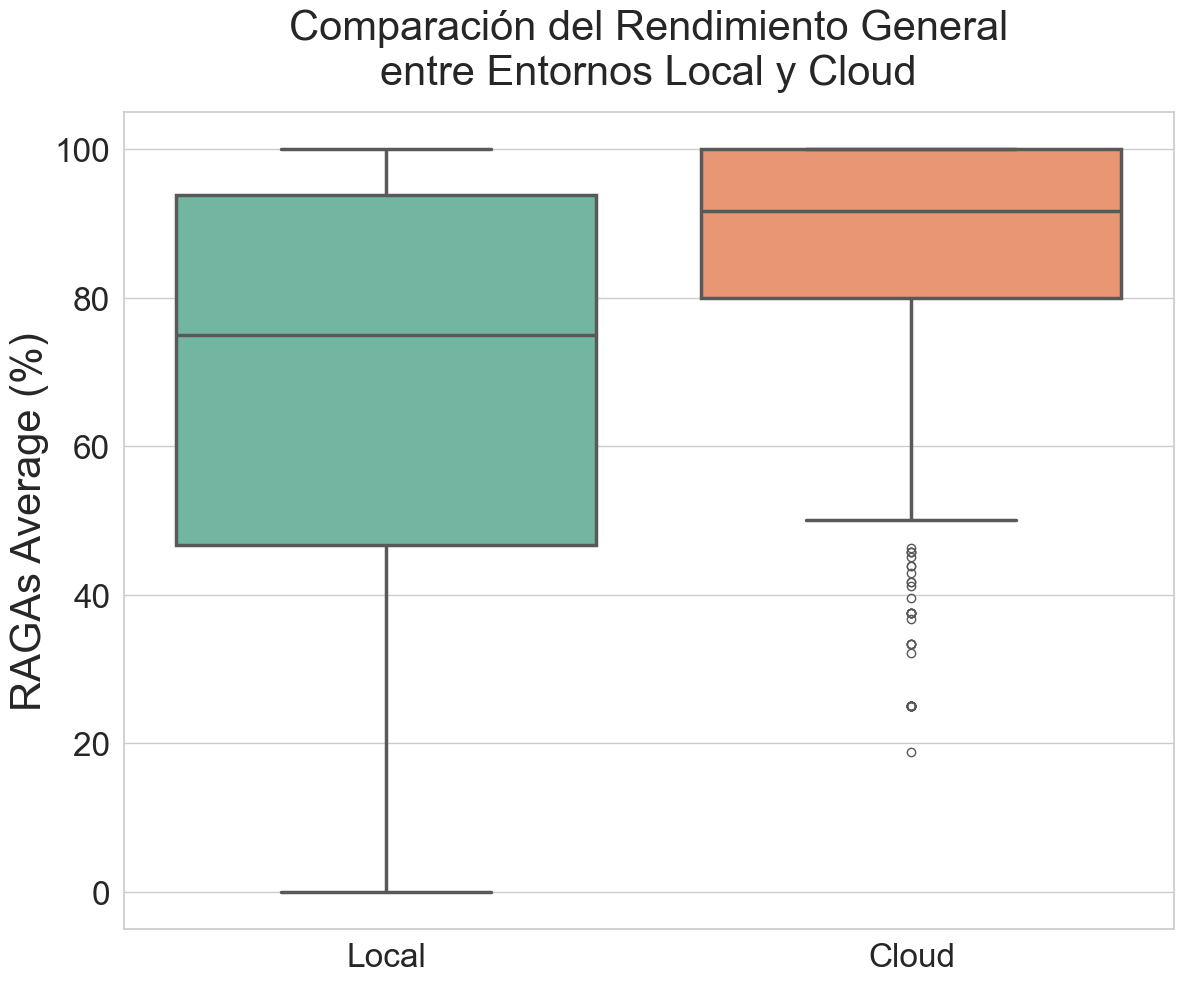

In [99]:
## ----------------------------------------------------------------------------
## COMPARACIÓN DE RENDIMIENTO GLOBAL POR ENTORNO - POR TEST
## ----------------------------------------------------------------------------
# Cargar el DataFrame de resultados
df = pd.read_csv("../Results/Results.csv", dtype={'question_id': str})

# Filtrar los datos para incluir solo los entornos Local y Cloud
filtered_df = df[df['Environment'].isin(['Local', 'Cloud'])]

# Crear un Boxplot del promedio separado por entorno
plt.figure(figsize=(12, 10))
sns.boxplot(data=filtered_df, x='Environment', y='RAGAs Average', hue='Environment', palette="Set2", dodge=False, linewidth=2.5)
plt.title('Comparación del Rendimiento General\nentre Entornos Local y Cloud', fontsize=30, pad=20)
plt.ylabel('RAGAs Average (%)', fontsize=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('')
plt.legend([],[], frameon=False)

# Ajustes generales de diseño
plt.tight_layout()

# Guardar la figura
plt.savefig("../Results/comparacion_rendimiento_global_entornos_por_test.png")

# Mostrar la figura
plt.show()

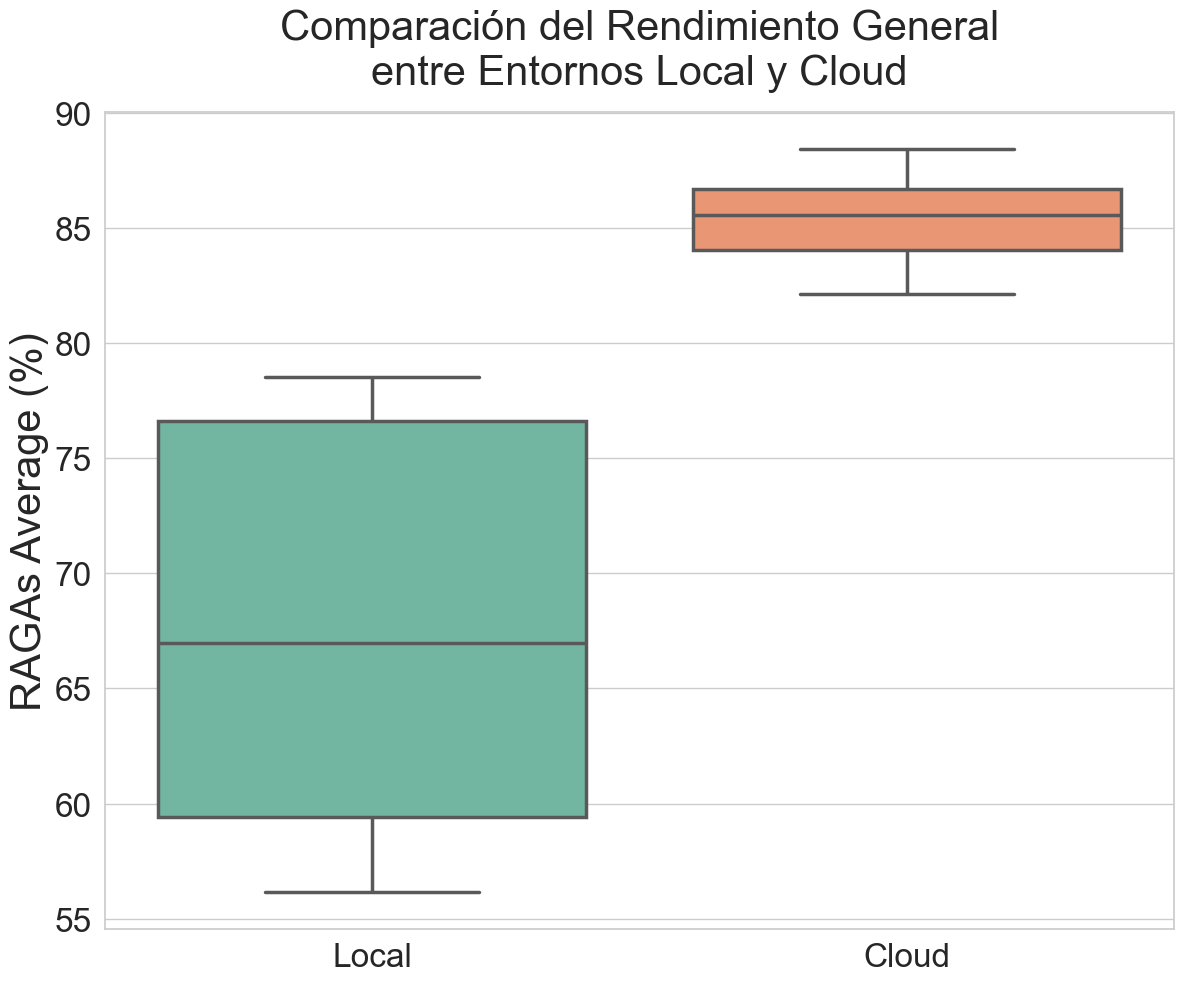

In [100]:
## ----------------------------------------------------------------------------
## COMPARACIÓN DE RENDIMIENTO GLOBAL POR ENTORNO - POR PIPELINE
## ----------------------------------------------------------------------------
# Cargar el DataFrame de resultados
df = pd.read_csv("../Results/Results.csv", dtype={'question_id': str})

# Filtrar los datos para incluir solo los entornos Local y Cloud
filtered_df = df[df['Environment'].isin(['Local', 'Cloud'])]

# Seleccionar las métricas relevantes
metrics = ['Contextual Precision', 'Contextual Recall', 'Answer Relevancy', 'Faithfulness', 'RAGAs Average']

# Agrupar por pipeline
grouped_df = filtered_df.groupby(['pdf_loader', 'embedding_model', 'db_provider', 'llm_model', 'Environment'])[metrics].mean().reset_index()

# Crear un Boxplot del promedio separado por entorno
plt.figure(figsize=(12, 10))
sns.boxplot(data=grouped_df, x='Environment', y='RAGAs Average', hue='Environment', palette="Set2", dodge=False, linewidth=2.5)
plt.title('Comparación del Rendimiento General\nentre Entornos Local y Cloud', fontsize=30, pad=20)
plt.ylabel('RAGAs Average (%)', fontsize=30)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('')
plt.legend([],[], frameon=False)

# Ajustes generales de diseño
plt.tight_layout()

# Guardar la figura
plt.savefig("../Results/comparacion_rendimiento_global_entornos_por_pipeline.png")

# Mostrar la figura
plt.show()

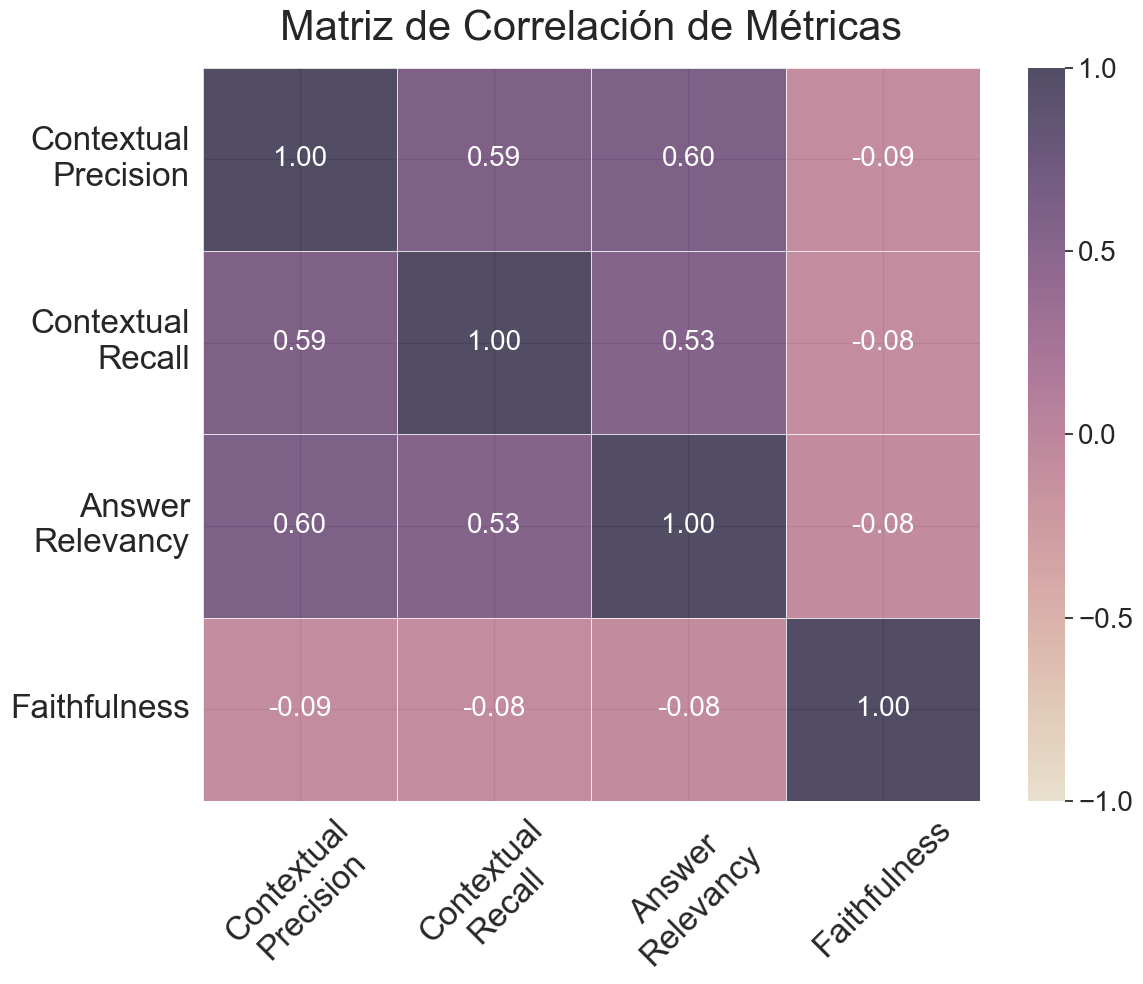

In [106]:
## ----------------------------------------------------------------------------
## MATRIZ DE CORRELACIÓN DE MÉTRICAS RAGAS
## ----------------------------------------------------------------------------
# Cargar el DataFrame de resultados
df = pd.read_csv("../Results/Results.csv", dtype={'question_id': str})

# Seleccionar las métricas relevantes
metrics_without_average = ['Contextual Precision', 'Contextual Recall', 'Answer Relevancy', 'Faithfulness']

# Calcular la matriz de correlación
correlation_matrix = df[metrics_without_average].corr(method='pearson')

# Crear un heatmap para la matriz de correlación
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), 
    cbar=True, 
    linewidths=0.5, 
    linecolor='white', 
    annot_kws={"size": 20}, 
    alpha=0.8, 
    vmin=-1, 
    vmax=1
)

# Adjust labels to have new lines instead of spaces
labels = [label.replace(" ", "\n") for label in correlation_matrix.columns]
heatmap.set_xticklabels(labels, fontsize=24, rotation=45)
heatmap.set_yticklabels(labels, fontsize=24, rotation=0)

colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=20) 
colorbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.title('Matriz de Correlación de Métricas', fontsize=30, pad=20)

# Ajustes generales de diseño
plt.tight_layout()

# Guardar la figura
plt.savefig("../Results/matriz_correlacion_metricas.png")

# Mostrar la figura
plt.show()

/var/folders/9f/b_qzvt690gzdb4gk4hsh_h940000gn/T/ipykernel_3241/842712140.py:36: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



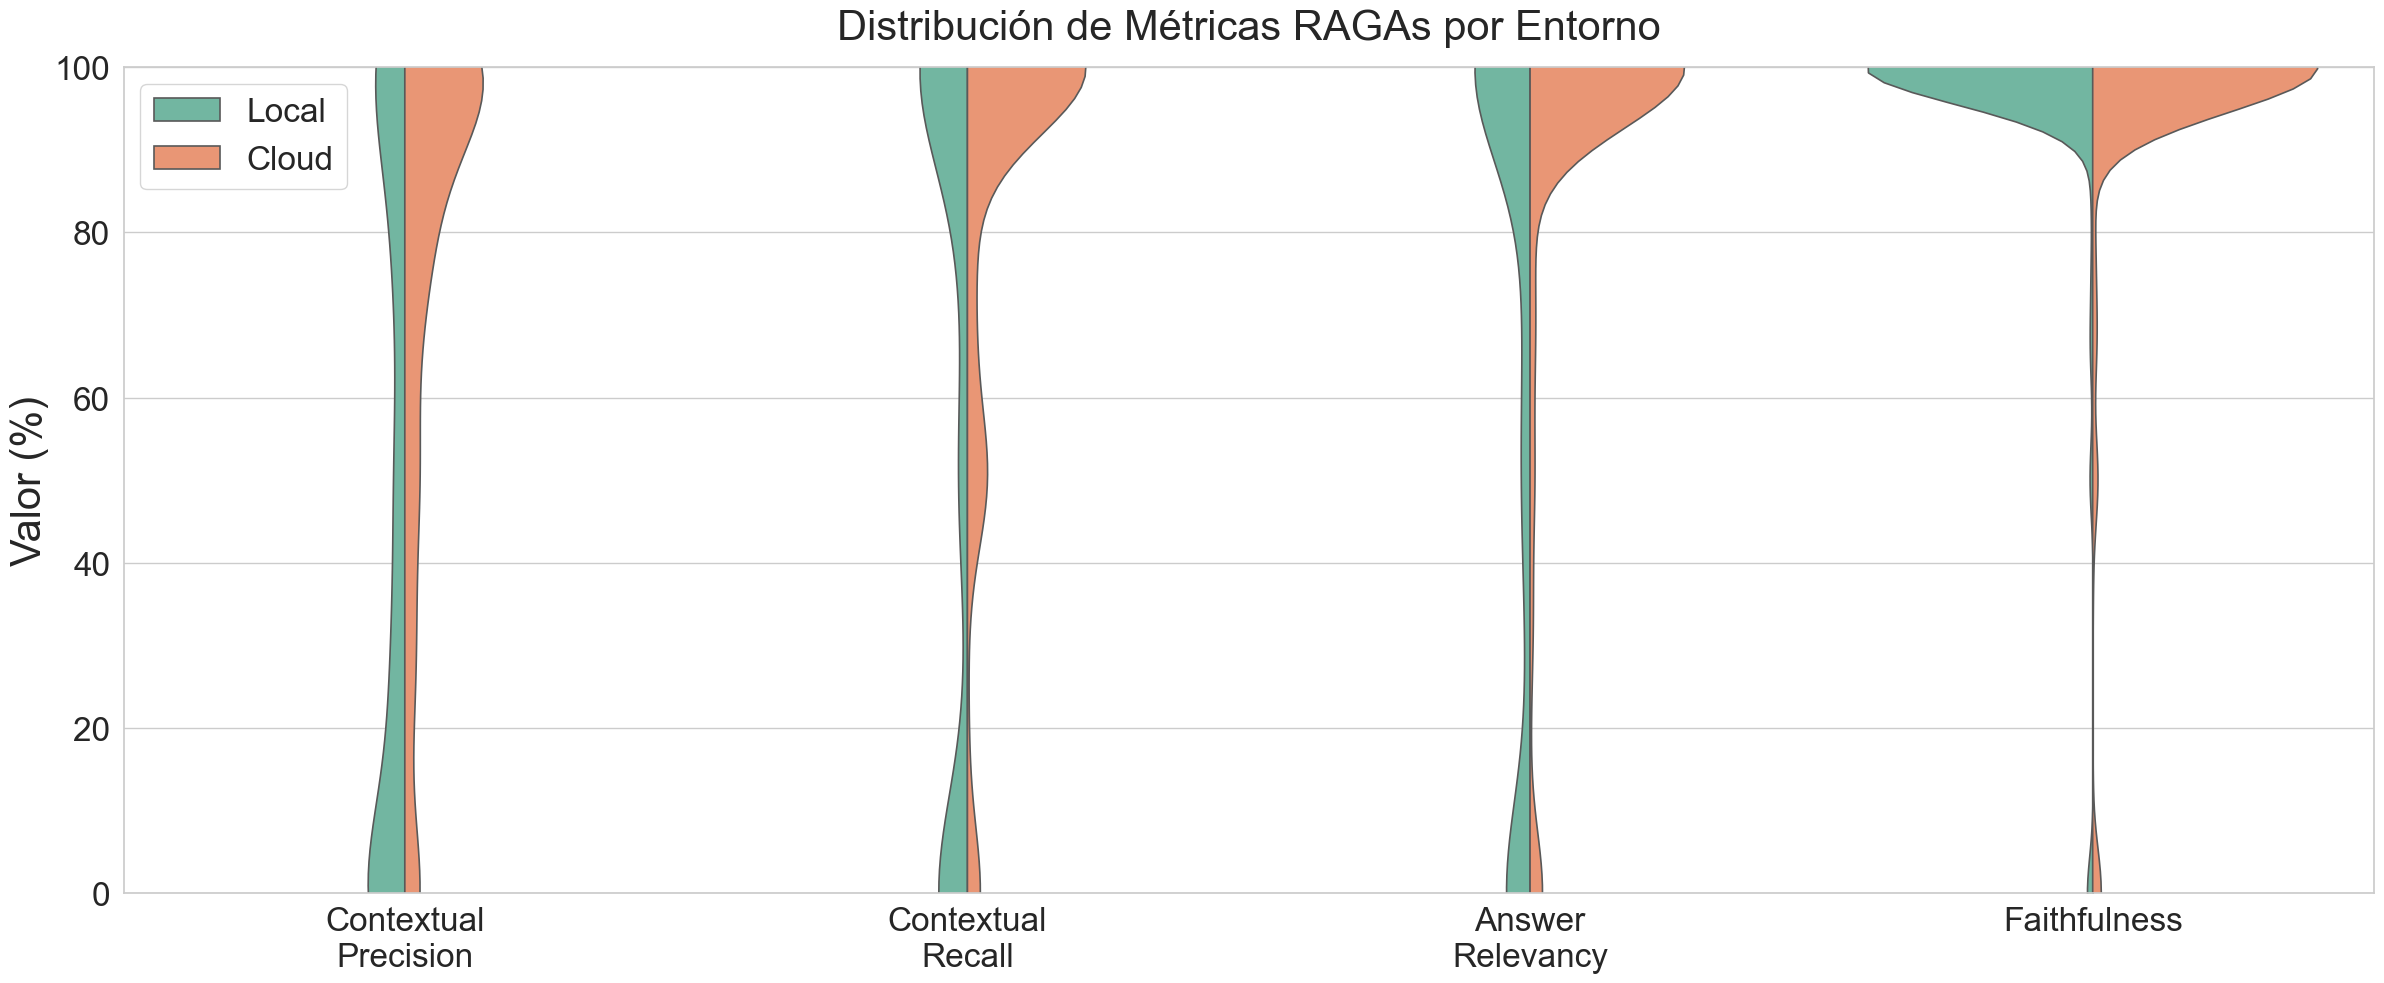

In [107]:
## ----------------------------------------------------------------------------
## DENSAIDAD DE MÉTRICAS RAGAS POR ENTORNO - POR TEST
## ----------------------------------------------------------------------------
# Cargar el DataFrame de resultados
df = pd.read_csv("../Results/Results.csv", dtype={'question_id': str})

# Filtrar los datos para incluir solo los entornos Local y Cloud
filtered_df = df[df['Environment'].isin(['Local', 'Cloud'])]

# Seleccionar las métricas relevantes
metrics_without_average = ['Contextual Precision', 'Contextual Recall', 'Answer Relevancy', 'Faithfulness']

# Formatear los datos para el Violin Plot
melted_df = pd.melt(
    filtered_df, 
    id_vars=['Environment'], 
    value_vars=metrics_without_average, 
    var_name='Métrica', 
    value_name='Valor'
)

# Crear Violin Plots
plt.figure(figsize=(24, 10))
sns.violinplot(data=melted_df, x='Métrica', y='Valor', hue='Environment', palette='Set2', split=True, inner=None, linewidth=1.2)
plt.title('Distribución de Métricas RAGAs por Entorno', fontsize=30, pad=20)
plt.ylabel('Valor (%)', fontsize=30)
plt.xlabel('')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, 100)
plt.grid(True)
plt.legend(fontsize=24, loc='upper left')

# Adjust labels to have new lines instead of spaces
labels = [label.replace(" ", "\n") for label in melted_df['Métrica'].unique()]
plt.gca().set_xticklabels(labels)

# Ajustes generales de diseño
plt.tight_layout()

# Guardar la figura
plt.savefig("../Results/densidad_metricas_ragas_por_entorno_test.png")

# Mostrar la figura
plt.show()

/var/folders/9f/b_qzvt690gzdb4gk4hsh_h940000gn/T/ipykernel_3241/2046522032.py:39: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



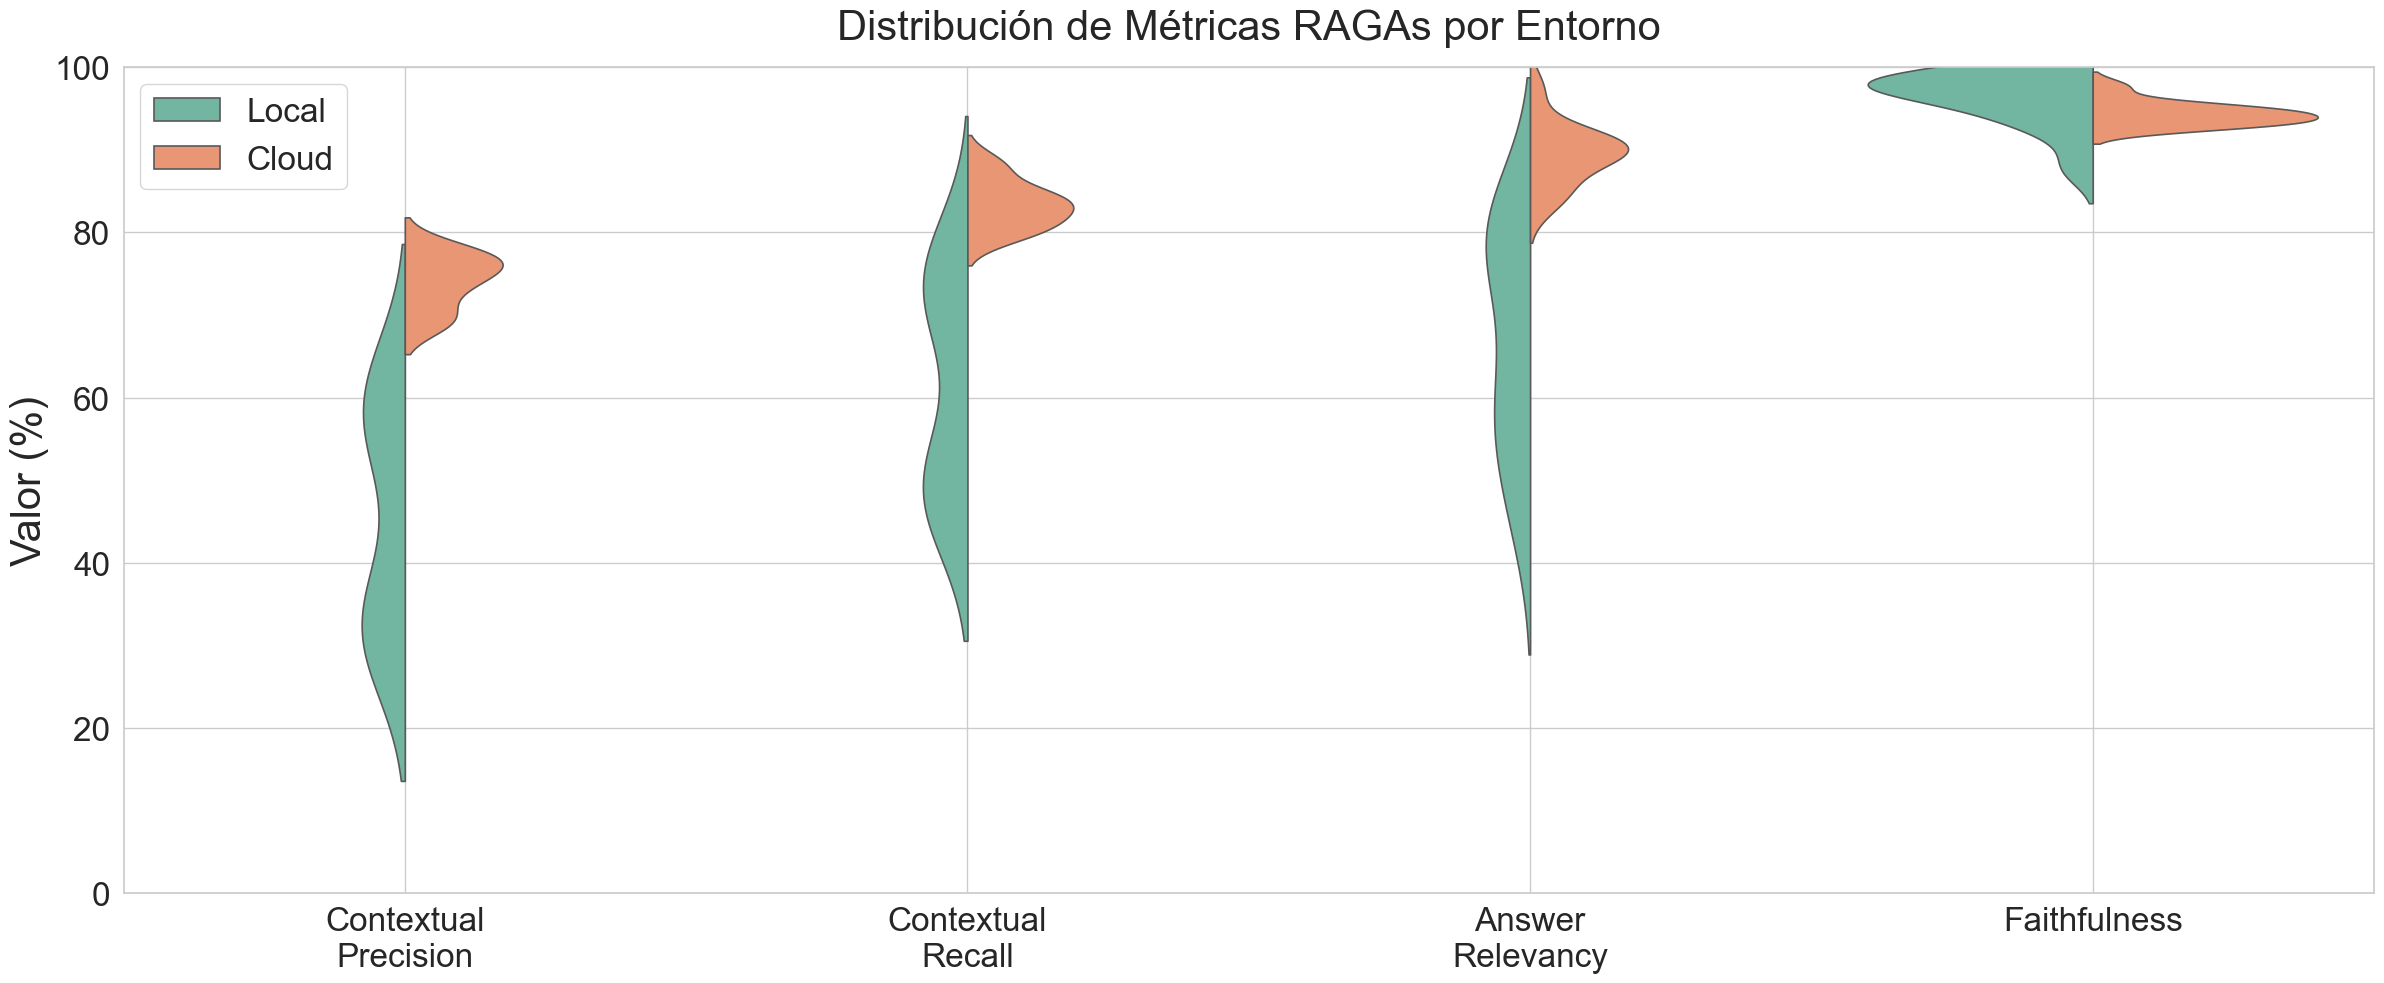

In [134]:
## ----------------------------------------------------------------------------
## DENSAIDAD DE MÉTRICAS RAGAS POR ENTORNO - POR PIPELINE
## ----------------------------------------------------------------------------
# Cargar el DataFrame de resultados
df = pd.read_csv("../Results/Results.csv", dtype={'question_id': str})

# Filtrar los datos para incluir solo los entornos Local y Cloud
filtered_df = df[df['Environment'].isin(['Local', 'Cloud'])]

# Seleccionar las métricas relevantes
metrics_without_average = ['Contextual Precision', 'Contextual Recall', 'Answer Relevancy', 'Faithfulness']

# Agrupar por pipeline
grouped_df = filtered_df.groupby(['pdf_loader', 'embedding_model', 'db_provider', 'llm_model', 'Environment'])[metrics_without_average].mean().reset_index()

# Formatear los datos para el Violin Plot
melted_df = pd.melt(
    grouped_df, 
    id_vars=['Environment'], 
    value_vars=metrics_without_average, 
    var_name='Métrica', 
    value_name='Valor'
)

# Crear Violin Plots
plt.figure(figsize=(24, 10))
sns.violinplot(data=melted_df, x='Métrica', y='Valor', hue='Environment', palette='Set2', split=True, inner=None, linewidth=1.2)
plt.title('Distribución de Métricas RAGAs por Entorno', fontsize=30, pad=20)
plt.ylabel('Valor (%)', fontsize=30)
plt.xlabel('')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0, 100)
plt.grid(True)
plt.legend(fontsize=24, loc='upper left')

# Adjust labels to have new lines instead of spaces
labels = [label.replace(" ", "\n") for label in melted_df['Métrica'].unique()]
plt.gca().set_xticklabels(labels)

# Ajustes generales de diseño
plt.tight_layout()

# Guardar la figura
plt.savefig("../Results/densidad_metricas_ragas_por_entorno_pipeline.png")

# Mostrar la figura
plt.show()

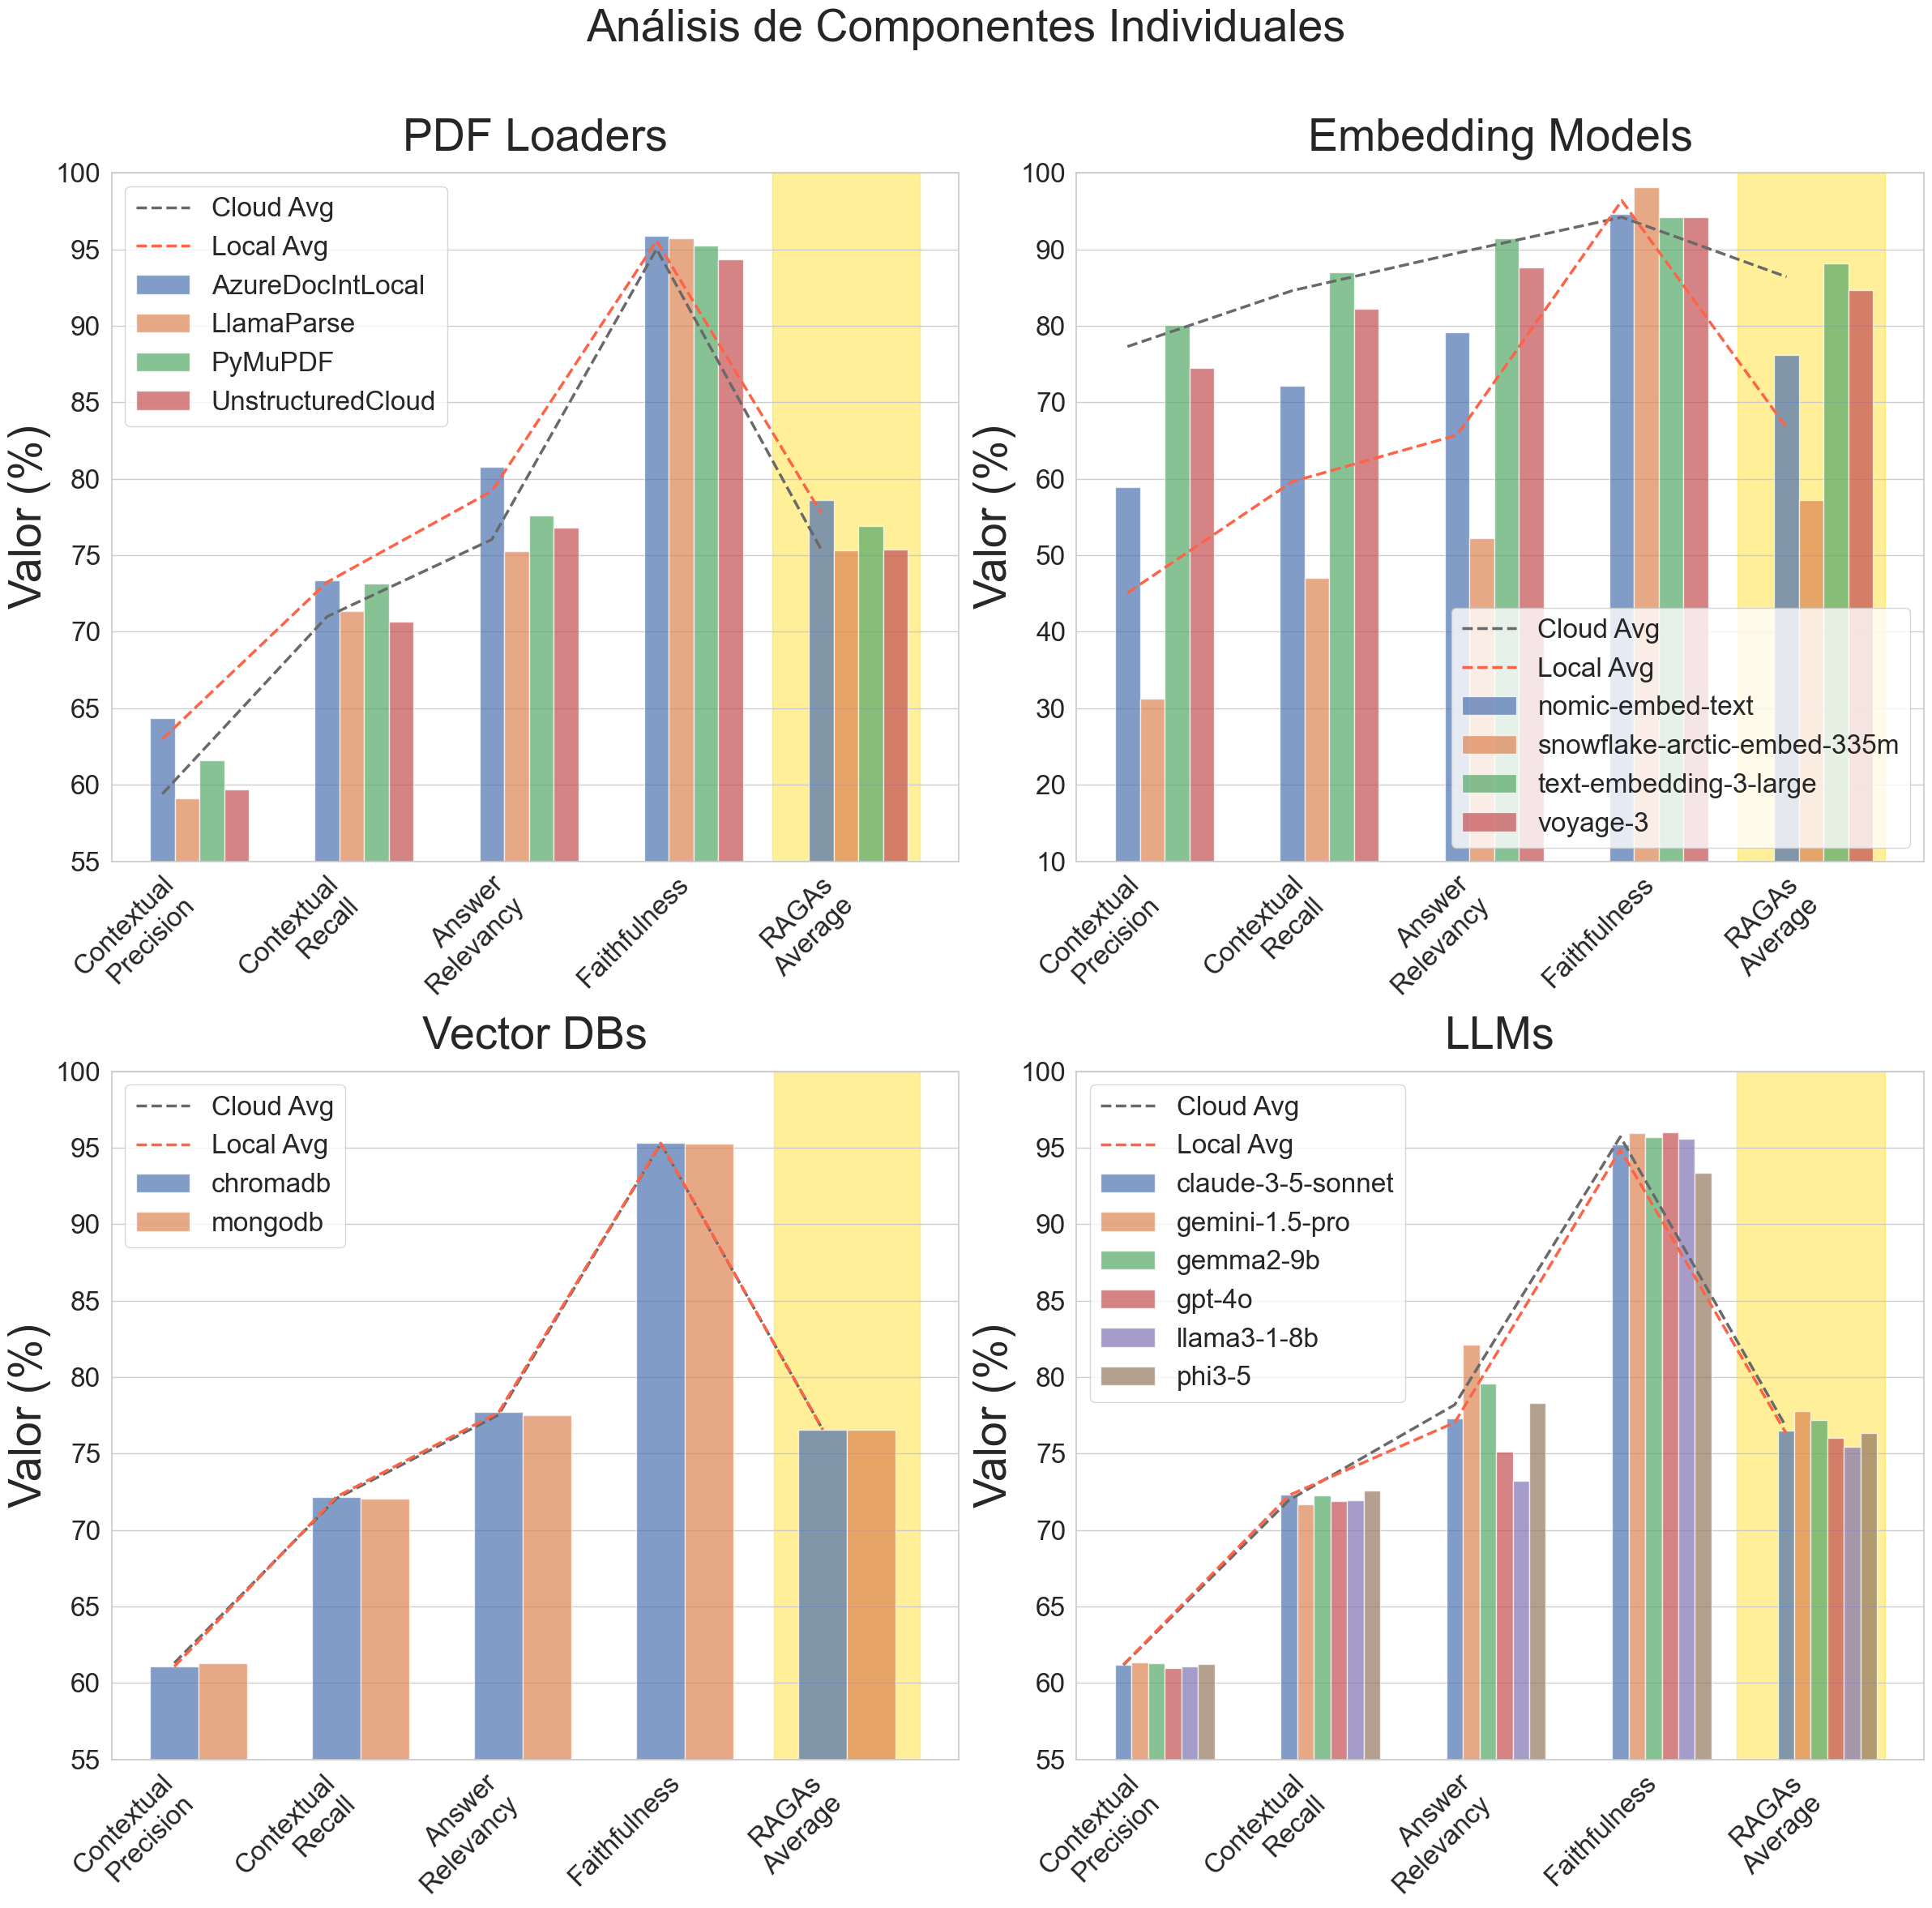

In [148]:
## ----------------------------------------------------------------------------
## ANÁLISIS DE COMPONENTES INDIVIDUALES
## ----------------------------------------------------------------------------
# Cargar el DataFrame de resultados
df = pd.read_csv("../Results/Results.csv", dtype={'question_id': str})

# Seleccionar las métricas relevantes
numeric_columns = ['Contextual Precision', 'Contextual Recall', 'Answer Relevancy', 'Faithfulness', 'RAGAs Average']

# Calcular promedios por componente
loader_averages = df.groupby('pdf_loader')[numeric_columns].mean()
embedding_averages = df.groupby('embedding_model')[numeric_columns].mean()
db_averages = df.groupby('db_provider')[numeric_columns].mean()
llm_averages = df.groupby('llm_model')[numeric_columns].mean()

# Dividir componentes por entorno
cloud_loaders = ['UnstructuredCloud', 'LlamaParse']
local_loaders = ['PyMuPDF', 'AzureDocIntLocal']

cloud_embeddings = ['text-embedding-3-large', 'voyage-3']
local_embeddings = ['nomic-embed-text', 'snowflake-arctic-embed-335m']

cloud_dbs = ['mongodb']
local_dbs = ['chromadb']

cloud_llms = ['gpt-4o', 'claude-3-5-sonnet', 'gemini-1.5-pro']
local_llms = ['gemma2-9b', 'llama3-1-8b', 'phi3-5']

# Calcular promedios por entorno para cada tipo de componente
cloud_average_loaders = loader_averages.loc[cloud_loaders].mean()
local_average_loaders = loader_averages.loc[local_loaders].mean()

cloud_avg_embeddings = embedding_averages.loc[cloud_embeddings].mean()
local_avg_embeddings = embedding_averages.loc[local_embeddings].mean()

cloud_avg_dbs = db_averages.loc[cloud_dbs].mean()
local_avg_dbs = db_averages.loc[local_dbs].mean()

cloud_avg_llms = llm_averages.loc[cloud_llms].mean()
local_avg_llms = llm_averages.loc[local_llms].mean()

# Configuración de estilo general
sns.set_theme(style="whitegrid")

# Función auxiliar para cada subplot
def plot_subplot(ax, data, cloud_avg, local_avg, title, bar_width, ylim):
    # Barras para cada componente
    components = data.index
    num_metrics = len(numeric_columns)
    for idx, component in enumerate(components):
        ax.bar([x + idx * bar_width for x in range(num_metrics)], data.loc[component], width=bar_width, label=component, alpha=0.7)

    # Fondo destacado para la métrica de promedio
    ax.axvspan(num_metrics - 1 - bar_width * len(components) / 2, num_metrics - 1 + bar_width * len(components), color='gold', alpha=0.4, zorder=0)

    # Líneas promedio para Cloud y Local
    obscure_colors = ['#696969', '#FF6347']
    ax.plot(range(num_metrics), cloud_avg, linestyle='--', color=obscure_colors[0], linewidth=2.5, label='Cloud Avg')
    ax.plot(range(num_metrics), local_avg, linestyle='--', color=obscure_colors[1], linewidth=2.5, label='Local Avg')
    
    # Configurar el subplot
    ax.set_title(title, fontsize=40, pad=20)
    ax.set_ylim(*ylim)
    ax.set_xticks([x + (len(components) - 1) * bar_width / 2 for x in range(num_metrics)])
    ax.set_xticklabels([label.replace(" ", "\n") for label in numeric_columns], rotation=45, ha='right', fontsize=24)
    ax.set_ylabel('Valor (%)', fontsize=40)
    ax.yaxis.grid(True)
    ax.xaxis.grid(False)
    ax.legend(loc='upper left' if title != 'Embedding Models' else 'lower right', fontsize=24)
    ax.tick_params(axis='y', labelsize=24)

# Crear un conjunto de gráficos 2x2
fig, axs = plt.subplots(2, 2, figsize=(24, 24))
plot_subplot(axs[0, 0], loader_averages, cloud_average_loaders, local_average_loaders, 'PDF Loaders', bar_width=0.15, ylim=(55, 100))
plot_subplot(axs[0, 1], embedding_averages, cloud_avg_embeddings, local_avg_embeddings, 'Embedding Models', bar_width=0.15, ylim=(10, 100))
plot_subplot(axs[1, 0], db_averages, cloud_avg_dbs, local_avg_dbs, 'Vector DBs', bar_width=0.3, ylim=(55, 100))
plot_subplot(axs[1, 1], llm_averages, cloud_avg_llms, local_avg_llms, 'LLMs', bar_width=0.1, ylim=(55, 100))
fig.suptitle('Análisis de Componentes Individuales', fontsize=40)

# Ajustes generales de diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Guardar la figura
plt.savefig("../Results/analisis_componentes_individuales.png")

# Mostrar la figura
plt.show()

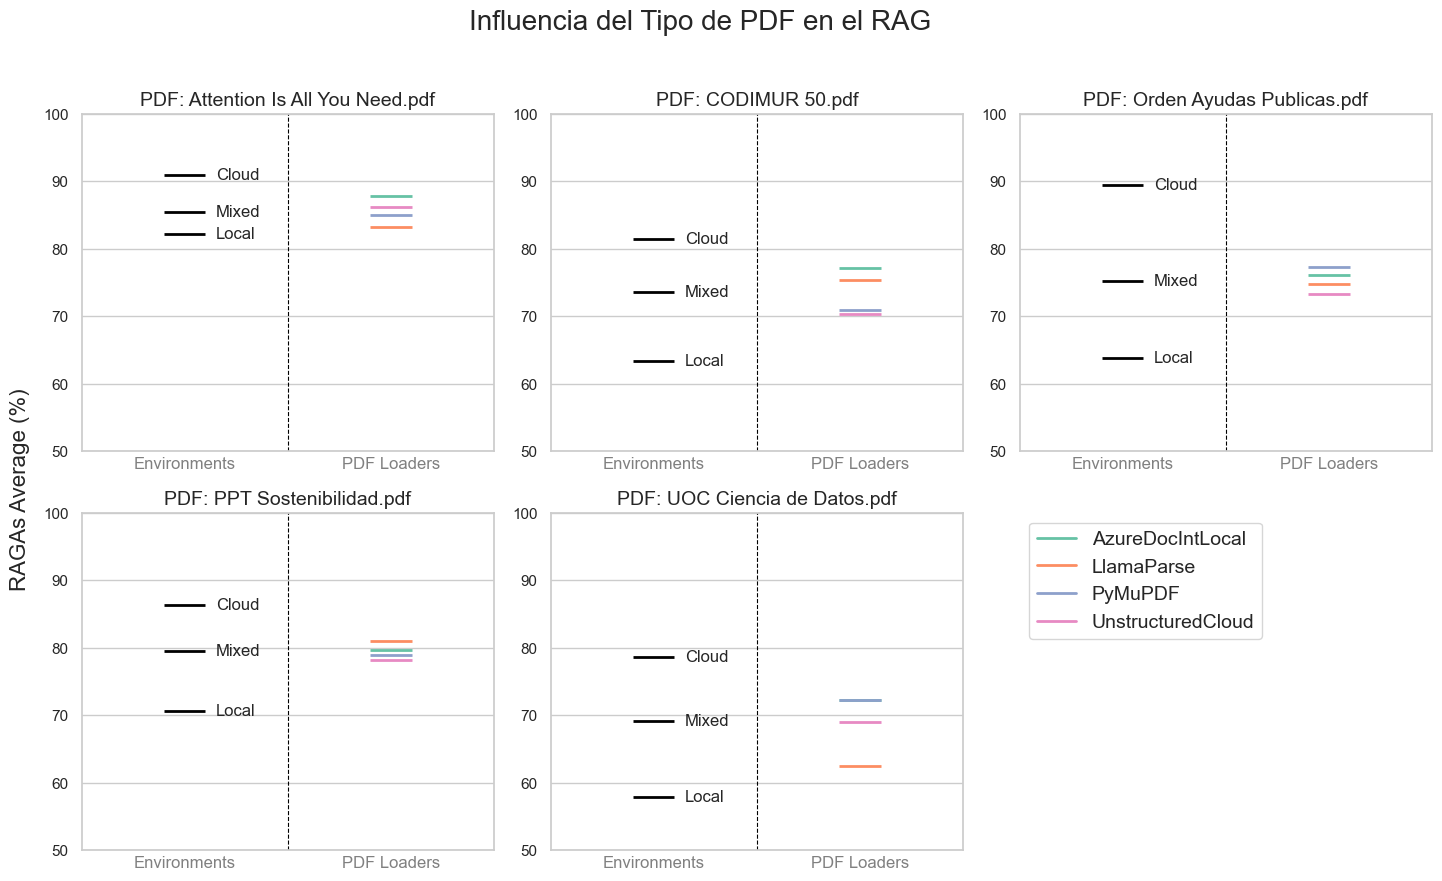

In [9]:
## ----------------------------------------------------------------------------
## INFLUENCIA DEL TIPO DE PDF Y EL PDF LOADER EN EL RAG
## ----------------------------------------------------------------------------
# Cargar el DataFrame de resultados
df = pd.read_csv("../Results/Results.csv", dtype={'question_id': str})

# Seleccionar las métricas relevantes
numeric_columns = ['Contextual Precision', 'Contextual Recall', 'Answer Relevancy', 'Faithfulness', 'RAGAs Average']

# Agrupar datos para calcular los promedios
env_averges = df.groupby(['source', 'Environment'])[numeric_columns].mean().reset_index()
loader_averages = df.groupby(['source',  'pdf_loader'])[numeric_columns].mean().reset_index()

# Crear una cuadrícula 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterar sobre los PDFs
pdfs = df['source'].unique().tolist()
for idx, pdf in enumerate(pdfs):
    row, col = divmod(idx, 3)
    ax = axes[row, col]
    
    # Dibujar las líneas horizontales para los entornos
    env_means = env_averges[env_averges['source'] == pdf].groupby('Environment')['RAGAs Average'].mean()
    for y, env in zip([-2, -1, 0], env_means.items()):
        ax.hlines(y=env[1], xmin=-0.1, xmax=0.1, color='black', linewidth=2)
        ax.text(0.15, env[1], env[0], va='center', ha='left', fontsize=12)
    
    # Dibujar las líneas horizontales para los loaders
    colors = sns.color_palette("Set2", 4)
    loader_means = loader_averages[loader_averages['source'] == pdf].groupby('pdf_loader')['RAGAs Average'].mean()
    for y, (loader, color) in zip([2, 3, 4, 5], zip(loader_means.items(), colors)):
        ax.hlines(y=loader[1], xmin=0.9, xmax=1.1, color=color, linewidth=2) 
        # ax.text(1.15, loader[1], loader[0], va='center', ha='left', fontsize=8, color=color)
        
    # Añadir etiquetas discretas para Environments y Loaders dentro de cada subplot
    ax.text(0, 48, "Environments", va='center', ha='center', fontsize=12, color='gray')
    ax.text(1, 48, "PDF Loaders", va='center', ha='center', fontsize=12, color='gray')
    
    # Configurar el subplot
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(50, 100)
    ax.set_xticks([]) 
    ax.set_title(f"PDF: {pdf}", fontsize=14)
    ax.axvline(x=0.5, color='black', linestyle='--', linewidth=0.8)

# Añadir leyenda para los loaders en el último subplot vacío
legend_elements = [Line2D([0], [0], color=color, lw=2, label=loader) for loader, color in zip(loader_means.index, colors)]
axes[1, 2].legend(handles=legend_elements, loc='upper left', fontsize=14)
axes[1, 2].axis('off')

# Añadir etiquetas
fig.text(0.04, 0.5, 'RAGAs Average (%)', va='center', rotation='vertical', fontsize=16)
fig.suptitle('Influencia del Tipo de PDF en el RAG', fontsize=20)

# Ajustes generales de diseño
plt.tight_layout(rect=[0.05, 0.1, 1, 0.96])

# Guardar la figura
plt.savefig("../Results/influencia_tipo_pdf_loader.png")

# Mostrar la figura
plt.show()

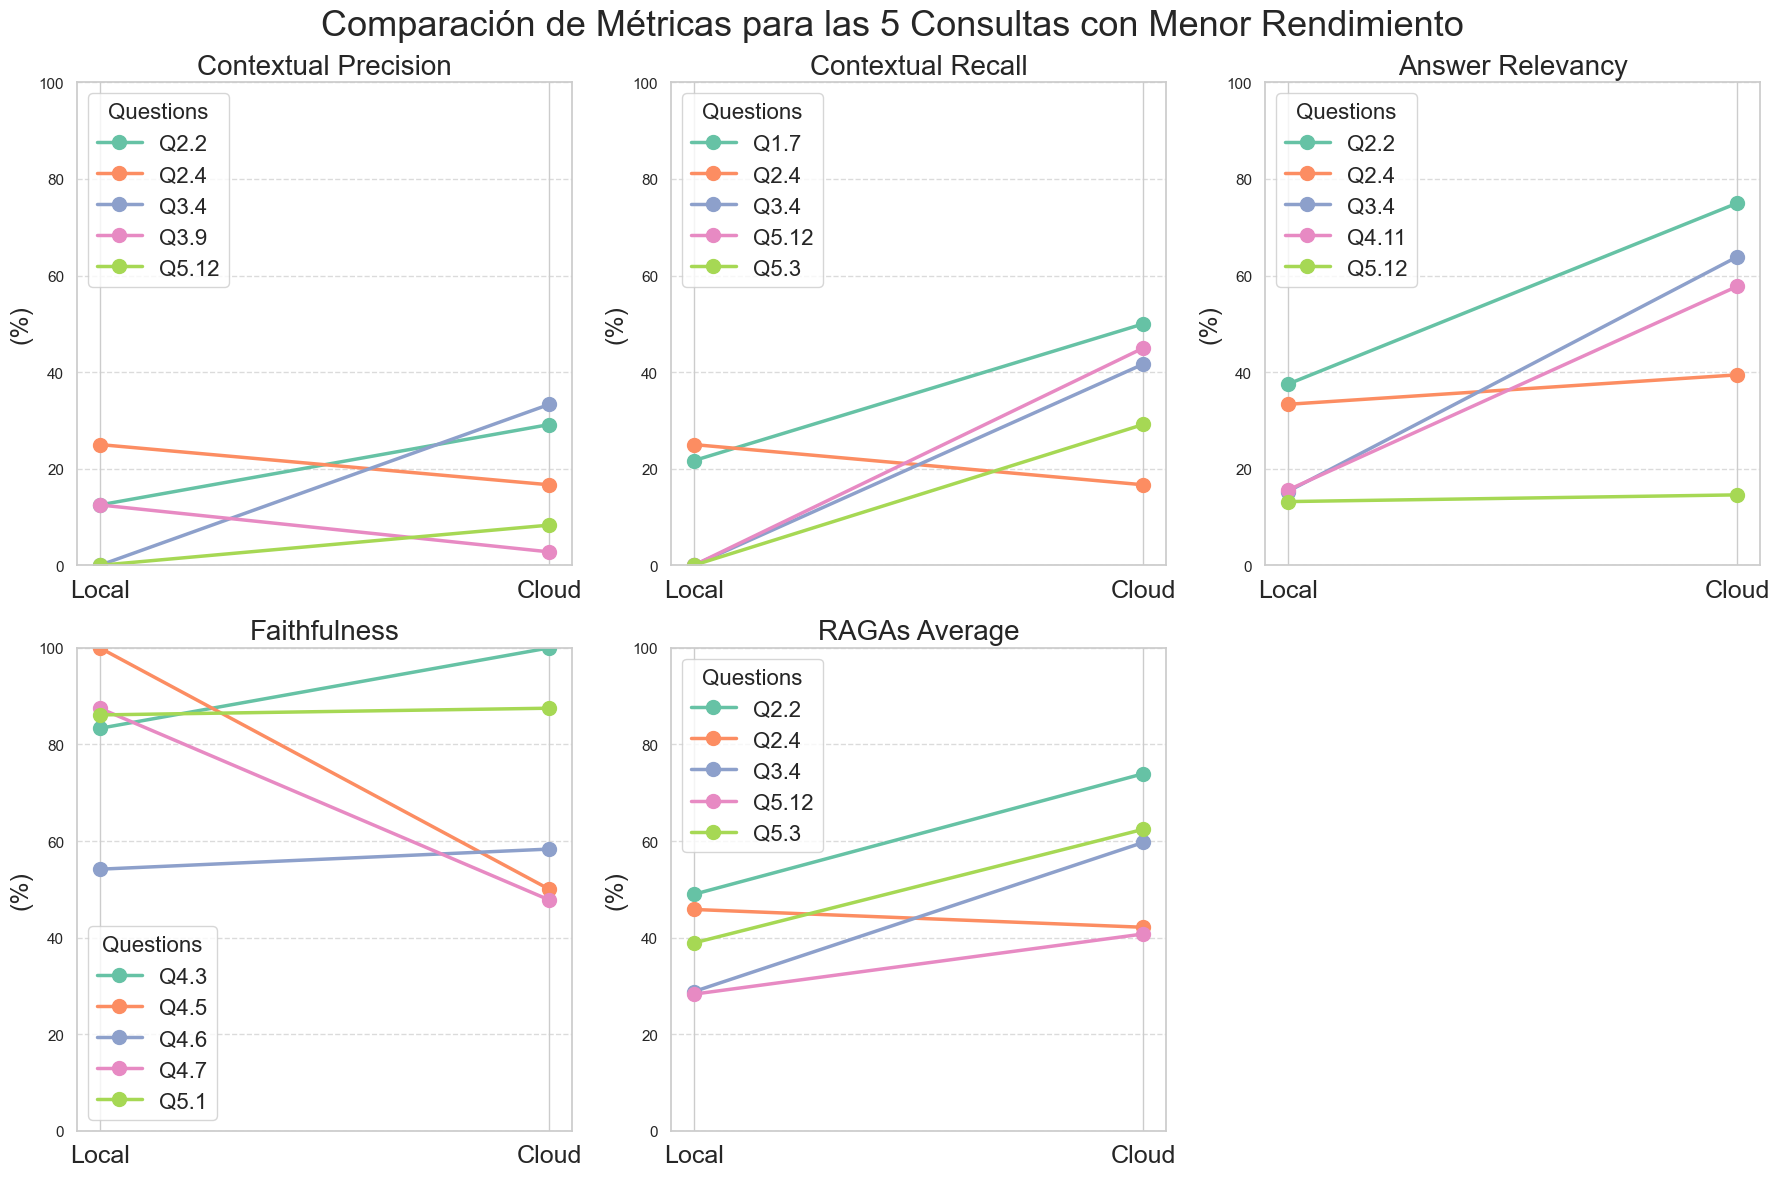

In [10]:
## ----------------------------------------------------------------------------
## LOLLIPOP PLOT PARA LOS 5 PEORES RESULTADOS
## ----------------------------------------------------------------------------
# Cargar el DataFrame de resultados
df = pd.read_csv("../Results/Results.csv", dtype={'question_id': str})

# Define las métricas a analizar
metrics = ['Contextual Precision', 'Contextual Recall', 'Answer Relevancy', 'Faithfulness', 'RAGAs Average']

# Crear subplots de 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    # Agrupar por question_id y calcular el promedio de la métrica actual
    avg_metric_per_question = df.groupby('question_id')[metric].mean()

    # Identificar las 5 peores preguntas basadas en el promedio de la métrica
    top_5_worst_questions = avg_metric_per_question.nsmallest(5).index

    # Filtrar el DataFrame para incluir solo las preguntas seleccionadas
    worst_questions_df = df[df['question_id'].isin(top_5_worst_questions)]

    # Calcular el promedio de la métrica para cada entorno
    comparison_df = worst_questions_df.groupby(['question_id', 'Environment'])[metric].mean().unstack()

    # Dibujar el diagrama lollipop para la métrica actual (Cloud vs Local)
    ax = axes[i]
    colors = sns.color_palette("Set2", 5)
    for question_id, color in zip(comparison_df.index, colors):
        cloud_score = comparison_df.loc[question_id, 'Cloud']
        local_score = comparison_df.loc[question_id, 'Local']
        ax.plot([1, 2], [local_score, cloud_score], marker='o', markersize=10, linewidth=2.5, label=f"Q{question_id}", color=color)

    # Ajustes estéticos
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Local', 'Cloud'], fontsize=18)
    ax.set_ylabel(f"(%)", fontsize=18)
    ax.set_title(f"{metric}", fontsize=20)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend(title="Questions", fontsize=16, title_fontsize=16, loc='upper left' if metric != 'Faithfulness' else 'lower left')
    ax.set_ylim(0, 100)

# Eliminar subplots no utilizados si hay menos métricas
if len(metrics) < len(axes):
    for j in range(len(metrics), len(axes)):
        fig.delaxes(axes[j])

# Añadir título general
fig.suptitle('Comparación de Métricas para las 5 Consultas con Menor Rendimiento', fontsize=26)

# Ajustes generales de diseño
plt.tight_layout()

# Guardar la figura
plt.savefig("../Results/comparacion_metricas_peores_resultados.png")

# Mostrar la figura
plt.show()

In [119]:
## ----------------------------------------------------------------------------
## SUNBURST CHART DE RAGAS AVERAGE POR COMPONENTES
## ----------------------------------------------------------------------------
import plotly.io as pio
pio.renderers.default = 'notebook'

# Cargar el DataFrame de resultados
df = pd.read_csv("../Results/Results.csv", dtype={'question_id': str})

# Filtrar los datos para incluir solo los entornos Local y Cloud
filtered_df = df[df['Environment'].isin(['Local', 'Cloud'])]

# Preparar datos para Sunburst
sunburst_data = filtered_df.groupby(['Environment', 'pdf_loader', 'db_provider', 'embedding_model', 'llm_model'])['RAGAs Average'].mean().reset_index()

# Crear el gráfico Sunburst
fig = px.sunburst(
    sunburst_data,
    path=['Environment', 'pdf_loader', 'db_provider', 'embedding_model', 'llm_model'],
    values='RAGAs Average',
    color='RAGAs Average',
    color_continuous_scale='Blues',
    title='Sunburst Chart of RAGAs Average by Environment and Components'
)

# Personalizar la fuente y el diseño
fig.update_layout(
    font=dict(
        family="Arial, sans-serif", 
        size=20,
        color="black"
    ),
    title_font=dict(
        family="Arial, sans-serif",
        size=30,
        color="black"
    ),
    title_x=0.5,
    coloraxis_colorbar=dict(
        title=""
    ),
    width=1000,
    height=800 
)

# Mostrar el gráfico
fig.show()